In [1]:
import csv, os
from xml.etree import ElementTree as ET
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

全部xml分析

In [3]:
All_data = []
for i in range(10):
    All_data.append(pd.read_csv(f'all_data/All_data_part{i}.csv', index_col=0, low_memory=False))
    print(len(All_data[i].columns))

216
218
218
218
218
219
219
219
219
219


In [4]:
All = pd.concat(All_data)
All

,id_info/org_study_id,id_info/secondary_id,id_info/nct_id,brief_title,sponsors/lead_sponsor/agency,sponsors/lead_sponsor/agency_class,source,brief_summary/textblock,detailed_description/textblock,overall_status,...,location/contact_backup/phone_ext,overall_contact_backup/phone_ext,expanded_access_info/expanded_access_type_intermediate,expanded_access_info/expanded_access_type_treatment,oversight_info/is_unapproved_device,clinical_results/outcome_list/outcome/analysis_list/analysis/ci_upper_limit_na_comment,expanded_access_info/expanded_access_type_individual,clinical_results/baseline/measure_list/measure/analyzed_list/analyzed/units,clinical_results/baseline/measure_list/measure/analyzed_list/analyzed/scope,oversight_info/is_ppsd
NCT00000102,NCRR-M01RR01070-0506,M01RR001070,NCT00000102,Congenital Adrenal Hyperplasia: Calcium Channe...,National Center for Research Resources (NCRR),NIH,National Center for Research Resources (NCRR),\n This study will test the ability of ex...,\n This protocol is designed to assess bo...,Completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NCT00000104,NCRR-M01RR00400-0587,M01RR000400,NCT00000104,Does Lead Burden Alter Neuropsychological Deve...,National Center for Research Resources (NCRR),NIH,National Center for Research Resources (NCRR),\n Inner city children are at an increase...,NaN,Completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NCT00000105,2002LS032,MT1999-06,NCT00000105,Vaccination With Tetanus and KLH to Assess Imm...,"Masonic Cancer Center, University of Minnesota",Other,"Masonic Cancer Center, University of Minnesota",\n The purpose of this study is to learn ...,\n Patients will receive each vaccine onc...,Terminated,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NCT00000106,NCRR-M01RR03186-9943,M01RR003186,NCT00000106,41.8 Degree Centigrade Whole Body Hyperthermia...,National Center for Research Resources (NCRR),NIH,National Center for Research Resources (NCRR),\n Recently a non-toxic system for whole ...,NaN,Unknown status,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NCT00000107,NCRR-M01RR00109-0737,M01RR000109,NCT00000107,Body Water Content in Cyanotic Congenital Hear...,National Center for Research Resources (NCRR),NIH,National Center for Research Resources (NCRR),\n Adults with cyanotic congenital heart ...,NaN,Completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCT06264297,01-22-270-111,NaN,NCT06264297,High-Voltage Pulsed Radiofrequency of the Lumb...,Consorci Sanitari de Terrassa,Other,Consorci Sanitari de Terrassa,\n The management of chronic lumbar radic...,NaN,Recruiting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NCT06264310,R2R01-WHF-201,NaN,NCT06264310,"To Evaluate the Safety, Tolerability and Effic...",River 2 Renal Corp.,Industry,River 2 Renal Corp.,\n This Study Aims to Evaluate the Safety...,"\n This is a Phase 2, Double-Blind, Place...",Not yet recruiting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NCT06264323,UI-5487,NaN,NCT06264323,Incidence of Acute Injuries in Boxing,University of Iceland,Other,University of Iceland,\n A prospective cohort study with 9 mont...,\n QUALITY ASSURANCE PLAN:\r\n\r\n M...,Completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NCT06264336,UIC AHS Pilot 2024,NaN,NCT06264336,Effects of High-intensity Gait Training on Fat...,University of Illinois at Chicago,Other,University of Illinois at Chicago,\n Nearly 1 million individuals in the Un...,\n Multiple sclerosis (MS) is an immune-m...,Not yet recruiting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
why_stoppde = pd.read_csv('why_stopped.csv')

/tmp/ipykernel_1666595/2402368692.py:1: DtypeWarning: Columns (91,125,126,130,140,141,153,156,160,167,168,170,171,172,173,184,185,186,190,192,193,194,203,207,208,209,214,215,217,218) have mixed types. Specify dtype option on import or set low_memory=False.
  why_stoppde = pd.read_csv('why_stopped.csv')


In [6]:
pd.DataFrame(why_stoppde.columns).to_csv('feature_name.csv')

In [5]:
why_stoppde = All[~All['why_stopped'].isna()]
why_stoppde

,id_info/org_study_id,id_info/secondary_id,id_info/nct_id,brief_title,sponsors/lead_sponsor/agency,sponsors/lead_sponsor/agency_class,source,brief_summary/textblock,detailed_description/textblock,overall_status,...,location/contact_backup/phone_ext,overall_contact_backup/phone_ext,expanded_access_info/expanded_access_type_intermediate,expanded_access_info/expanded_access_type_treatment,oversight_info/is_unapproved_device,clinical_results/outcome_list/outcome/analysis_list/analysis/ci_upper_limit_na_comment,expanded_access_info/expanded_access_type_individual,clinical_results/baseline/measure_list/measure/analyzed_list/analyzed/units,clinical_results/baseline/measure_list/measure/analyzed_list/analyzed/scope,oversight_info/is_ppsd
NCT00000105,2002LS032,MT1999-06,NCT00000105,Vaccination With Tetanus and KLH to Assess Imm...,"Masonic Cancer Center, University of Minnesota",Other,"Masonic Cancer Center, University of Minnesota",\n The purpose of this study is to learn ...,\n Patients will receive each vaccine onc...,Terminated,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NCT00000270,NIDA-09236-5,"['5P50DA009236-18', 'P50-09236-5']",NCT00000270,Brain Imaging: Cocaine Effects & Medication De...,New York State Psychiatric Institute,Other,New York State Psychiatric Institute,\n The purpose of this study is to define...,NaN,Withdrawn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NCT00000305,NIDA-09262-2,"['P50DA009262', 'P50-09262-2']",NCT00000305,Amphetamine Cocaine Interaction Study - 2,"The University of Texas Health Science Center,...",Other,"The University of Texas Health Science Center,...",\n The purpose of this study is to evalua...,NaN,Terminated,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NCT00000309,NIDA-09330-1,"['R01DA009330', 'R01-09330-1']",NCT00000309,Serotonin/Dopamine Antagonism of Cocaine Effec...,Butler Hospital,Other,Butler Hospital,\n The purpose of this study is to evalua...,NaN,Terminated,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NCT00000340,NIDA-3-0010-5,Y01-3-0010-5,NCT00000340,Pemoline in the Treatment of Stimulant Depende...,National Institute on Drug Abuse (NIDA),NIH,National Institute on Drug Abuse (NIDA),\n The purpose of this study is to assess...,NaN,Withdrawn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCT06254911,STUDY00004678,"['NCI-2023-01367', 'STUDY00004678', 'WINSHIP57...",NCT06254911,Pre-operative Atezolizumab in Patients With Re...,Emory University,Other,Emory University,\n This phase II trial tests how well ate...,\n PRIMARY OBJECTIVES:\r\n\r\n I. To...,Suspended,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NCT06257563,2022P001401,NaN,NCT06257563,Toolkit for Experiential Well-beiNg in Dementi...,Massachusetts General Hospital,Other,Massachusetts General Hospital,\n The goal of this project is to conduct...,\n The aim of this phase is to assess ini...,Withdrawn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NCT06258499,CAR-BHA- U22,NaN,NCT06258499,Bone Healing Accelerant (BHA) Versus Autologou...,Carmell Therapeutics Corporation,Industry,Carmell Therapeutics Corporation,\n This study is being conducted to demon...,NaN,Withdrawn,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
NCT06259266,CHU-0171,2012-A00530-43,NCT06259266,Catheter Dysfunction Rate in Patients Undergoi...,"University Hospital, Clermont-Ferrand",Other,"University Hospital, Clermont-Ferrand",\n Catheter dysfunction and infections ar...,"\n Interventional prospective, multicente...",Withdrawn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Date feature analyze

In [8]:
date_columns = ['study_first_submitted', 'study_first_submitted_qc', 'study_first_posted' , 'last_update_submitted', 
                'last_update_submitted_qc','last_update_posted', 'start_date', 'completion_date', 'primary_completion_date', 
                'results_first_submitted',	'results_first_submitted_qc', 'results_first_posted', 'disposition_first_submitted',
                'disposition_first_submitted_qc', 'disposition_first_posted', 'pending_results/submitted', 'pending_results/returned'] 
why_stoppde[date_columns].isna().sum()

study_first_submitted                 0
study_first_submitted_qc              0
study_first_posted                    0
last_update_submitted                 0
last_update_submitted_qc              0
last_update_posted                    0
start_date                          372
completion_date                    1121
primary_completion_date            1084
results_first_submitted           29171
results_first_submitted_qc        29171
results_first_posted              29171
disposition_first_submitted       36681
disposition_first_submitted_qc    36684
disposition_first_posted          36684
pending_results/submitted         36984
pending_results/returned          37115
dtype: int64

In [17]:
date_examples = why_stoppde[date_columns]
for col in date_columns:
    date_examples[col] = pd.to_datetime(date_examples[col])
    print(col)

/tmp/ipykernel_9704/3057156765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_examples[col] = pd.to_datetime(date_examples[col])
/tmp/ipykernel_9704/3057156765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_examples[col] = pd.to_datetime(date_examples[col])
/tmp/ipykernel_9704/3057156765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

study_first_submitted
study_first_submitted_qc
study_first_posted
last_update_submitted
last_update_submitted_qc
last_update_posted


/tmp/ipykernel_9704/3057156765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_examples[col] = pd.to_datetime(date_examples[col])
/tmp/ipykernel_9704/3057156765.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_examples[col] = pd.to_datetime(date_examples[col])


start_date


/tmp/ipykernel_9704/3057156765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_examples[col] = pd.to_datetime(date_examples[col])
/tmp/ipykernel_9704/3057156765.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_examples[col] = pd.to_datetime(date_examples[col])


completion_date
primary_completion_date
results_first_submitted
results_first_submitted_qc
results_first_posted
disposition_first_submitted
disposition_first_submitted_qc
disposition_first_posted


/tmp/ipykernel_9704/3057156765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_examples[col] = pd.to_datetime(date_examples[col])
/tmp/ipykernel_9704/3057156765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_examples[col] = pd.to_datetime(date_examples[col])
/tmp/ipykernel_9704/3057156765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

DateParseError: Unknown datetime string format, unable to parse: ['April 4, 2022', 'December 5, 2022', 'January 23, 2023'], at position 1

In [18]:
date_examples

,study_first_submitted,study_first_submitted_qc,study_first_posted,last_update_submitted,last_update_submitted_qc,last_update_posted,start_date,completion_date,primary_completion_date,results_first_submitted,results_first_submitted_qc,results_first_posted,disposition_first_submitted,disposition_first_submitted_qc,disposition_first_posted,pending_results/submitted,pending_results/returned
NCT00000105,1999-11-03,1999-11-03,1999-11-04,2017-11-27,2017-11-27,2017-11-29,2002-07-01,2012-03-01,2012-03-01,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN
NCT00000270,1999-09-20,1999-09-20,1999-09-21,2017-08-01,2017-08-01,2017-08-02,1995-12-30,1995-12-30,1995-12-30,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN
NCT00000305,1999-09-20,1999-09-20,1999-09-21,2012-05-17,2012-05-17,2012-05-18,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN
NCT00000309,1999-09-20,1999-09-20,1999-09-21,2015-07-23,2015-07-23,2015-07-24,1994-08-01,2000-01-01,2000-01-01,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN
NCT00000340,1999-09-20,1999-09-20,1999-09-21,2017-01-11,2017-01-11,2017-01-12,1996-06-01,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCT06254911,2024-01-09,2024-02-05,2024-02-12,2024-02-05,2024-02-05,2024-02-12,2024-02-01,2026-08-04,2025-08-04,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN
NCT06257563,2024-01-19,2024-02-05,2024-02-14,2024-02-05,2024-02-05,2024-02-14,2024-02-01,2024-04-01,2024-03-01,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN
NCT06258499,2024-02-06,2024-02-06,2024-02-14,2024-02-06,2024-02-06,2024-02-14,2024-03-01,2024-11-01,2024-09-01,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN
NCT06259266,2013-11-26,2024-02-06,2024-02-14,2024-02-06,2024-02-06,2024-02-14,2013-12-01,2016-01-01,2016-01-01,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN


In [26]:
date_example = date_examples.iloc[4]
print(date_example.sort_values())
date_example = date_examples.iloc[0]
print(date_example.sort_values())
date_example = date_examples.iloc[2]
print(date_example.sort_values())
date_example = date_examples.iloc[1]
print(date_example.sort_values())
date_example = date_examples.iloc[5]
date_example.sort_values().index

start_date                       1996-06-01
study_first_submitted            1999-09-20
study_first_submitted_qc         1999-09-20
study_first_posted               1999-09-21
last_update_submitted            2017-01-11
last_update_submitted_qc         2017-01-11
last_update_posted               2017-01-12
completion_date                         NaT
primary_completion_date                 NaT
results_first_submitted                 NaT
results_first_submitted_qc              NaT
results_first_posted                    NaT
disposition_first_submitted             NaT
disposition_first_submitted_qc          NaT
disposition_first_posted                NaT
pending_results/submitted               NaT
pending_results/returned                NaT
Name: NCT00000340, dtype: datetime64[ns]
study_first_submitted            1999-11-03
study_first_submitted_qc         1999-11-03
study_first_posted               1999-11-04
start_date                       2002-07-01
completion_date                  20

Index(['start_date', 'study_first_submitted', 'study_first_submitted_qc',
       'study_first_posted', 'completion_date', 'primary_completion_date',
       'last_update_submitted', 'last_update_submitted_qc',
       'last_update_posted', 'results_first_submitted',
       'results_first_submitted_qc', 'results_first_posted',
       'disposition_first_submitted', 'disposition_first_submitted_qc',
       'disposition_first_posted', 'pending_results/submitted',
       'pending_results/returned'],
      dtype='object')

In [28]:
print(why_stoppde['brief_summary/textblock'].isna().sum())
print(why_stoppde['brief_title'].isna().sum())
print(why_stoppde['detailed_description/textblock'].isna().sum())

0
0
11449


In [5]:
why_stoppde.to_csv('why_stopped.csv')

In [5]:
all_data_outcome = pd.read_csv('All_data.csv', index_col=0)
all_data_outcome

/tmp/ipykernel_3168534/968867373.py:1: DtypeWarning: Columns (145,163,164) have mixed types. Specify dtype option on import or set low_memory=False.
  all_data_outcome = pd.read_csv('All_data.csv', index_col=0)


,id_info/org_study_id,id_info/secondary_id,id_info/nct_id,brief_title,sponsors/lead_sponsor/agency,sponsors/lead_sponsor/agency_class,source,brief_summary/textblock,detailed_description/textblock,overall_status,...,patient_data/ipd_info_type,patient_data/ipd_time_frame,patient_data/ipd_url,overall_contact_backup/phone,overall_contact_backup/email,clinical_results/baseline/measure_list/measure/class_list/class/analyzed_list/analyzed/units,clinical_results/baseline/measure_list/measure/class_list/class/analyzed_list/analyzed/scope,clinical_results/baseline/measure_list/measure/population,patient_data/ipd_access_criteria,trailOutcome
NCT00000102,NCRR-M01RR01070-0506,M01RR001070,NCT00000102,Congenital Adrenal Hyperplasia: Calcium Channe...,National Center for Research Resources (NCRR),NIH,National Center for Research Resources (NCRR),\n This study will test the ability of ex...,\n This protocol is designed to assess bo...,Completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Completed, Outcome unknown"
NCT00000105,2002LS032,MT1999-06,NCT00000105,Vaccination With Tetanus and KLH to Assess Imm...,"Masonic Cancer Center, University of Minnesota",Other,"Masonic Cancer Center, University of Minnesota",\n The purpose of this study is to learn ...,\n Patients will receive each vaccine onc...,Terminated,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Terminated, Other"
NCT00000172,IA0009,NaN,NCT00000172,Evaluation of Galantamine in the Treatment of ...,"Janssen, LP",Industry,National Institute on Aging (NIA),\n Galantamine is an experimental drug be...,\n After a 1-month single-blind run in ph...,Completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Completed, Positive outcome/primary endpoint(s..."
NCT00000173,IA0011,3U01AG010483-08S2,NCT00000173,Memory Impairment Study (Mild Cognitive Impair...,National Institute on Aging (NIA),NIH,National Institute on Aging (NIA),\n The National Institute on Aging (NIA) ...,\n This clinical trial will be a multicen...,Completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Completed, Positive outcome/primary endpoint(s..."
NCT00000174,IA0012,NaN,NCT00000174,Investigation Into Delay to Diagnosis of Alzhe...,Novartis,Industry,National Institute on Aging (NIA),\n This phase IIIb trial is a prospective...,NaN,Completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Completed, Negative outcome/primary endpoint(s..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCT03733301,17100,"['I4V-MC-JAIY', '2018-001726-26']",NCT03733301,A Study of Baricitinib (LY3009104) in Combinat...,Eli Lilly and Company,Industry,Eli Lilly and Company,\n The purpose of this study is to evalua...,NaN,Completed,...,"['Study Protocol', 'Statistical Analysis Plan ...",Data are available 6 months after the primary ...,https://vivli.org/,NaN,NaN,NaN,NaN,NaN,A research proposal must be approved by an ind...,"Completed, Positive outcome/primary endpoint(s..."
NCT03733574,LY03005/CT-USA-106,NaN,NCT03733574,A Study of LY03005 vs Pristiq,Luye Pharma Group Ltd.,Industry,Luye Pharma Group Ltd.,\n The objective of this study is to eval...,\n Fifty six (56) eligible subjects will ...,Completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Completed, Outcome unknown"
NCT03735446,18-468,NaN,NCT03735446,Prexasertib in Combination With MEC in Relapse...,Dana-Farber Cancer Institute,Other,Dana-Farber Cancer Institute,\n This research study is studying a targ...,\n This research study is a Phase I clini...,Terminated,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Terminated, Business decision - Other"
NCT03736044,PRUa1GR-2013 -00000156,NaN,NCT03736044,Reconstitution of CD4+CD25highCD127low/-Tcell,University Hospital of Ferrara,Other,University Hospital of Ferrara,\n Rheumatoid arthritis (RA) is a systemi...,\n 1. To evaluate the incidence of diseas...,Completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Completed, Outcome unknown"


In [7]:
outcomes = pd.read_csv('IQVIA/trial_outcomes_v1.csv', index_col=0)
outcomes

,trialOutcome
studyid,
NCT00000102,"Completed, Outcome unknown"
NCT00000105,"Terminated, Other"
NCT00000172,"Completed, Positive outcome/primary endpoint(s..."
NCT00000173,"Completed, Positive outcome/primary endpoint(s..."
NCT00000174,"Completed, Negative outcome/primary endpoint(s..."
...,...
NCT03733301,"Completed, Positive outcome/primary endpoint(s..."
NCT03733574,"Completed, Outcome unknown"
NCT03735446,"Terminated, Business decision - Other"


In [8]:
out_index = outcomes.index
why_index = why_stoppde.index
all_index = all_data_outcome[~all_data_outcome['why_stopped'].isna()].index
print(len(list(set(out_index) - set(why_index))))
print(len(list(set(why_index) - set(out_index))))
print(len(list(set(why_index) - set(all_index))))
print(len(list(set(all_index) - set(why_index))))

38576
28213
28213
0


poorenrollment select

In [9]:
PoorEnrollment = ['no participants enrolled', 'insufficient enrollment', 'no participants enrolled', 'poor enrollment rate', 'poor enrolment', 'enrollment difficulties', 
'difficulty in enrollment', 'no enrollment', 'inadequate enrollment', 'study terminated poor enrollment', 'poor patient enrollment', 'study stopped poor enrollment', 
'the study was terminated poor enrollment', 'terminated poor enrollment', 'difficulty in recruiting patients', 'no patients enrolled', 'inability to recruit patients',
'insufficient number of participants', 'poor inclusion', 'no participants', 'because of difficulties in recruting', 'no enrolement', 'due to poor recrutment', 
'because a significant decrease of viable candidates for the study', 'the study was terminated due to insufficient sample size and protocol compliance issue']
def why_stopped_re(value):
    if type(value) == str:
        value = value.lower()
        value = value.strip().strip('.').replace('accural','accrual').replace('acrual','accrual').replace('recruit', 'enroll').replace('lack of', 'poor').replace('slow', 'low').replace('low', 'poor').replace('enrolment', 'enrollment')
        if ('enrollment' in value) or ('enroll' in value) or ('accrual' in value) or ('patient' in value) or ('inclusion' in value) or ('subject' in value) or ('participants' in value):
            value = 'poor enrollment'
        if value in PoorEnrollment:
            value = 'poor enrollment'
        
    return value
# all_data_outcome['why_stopped'] = 
all_data_outcome['temp'] = all_data_outcome['why_stopped'].apply(why_stopped_re)
# why_stoppde['why_stopped'] = 
# why_stoppde['why_stopped'].apply(why_stopped_re).value_counts()

In [10]:
all_data_outcome['temp'].value_counts()

temp
poor enrollment                                                                                                                                                         4758
see termination reason in detailed description                                                                                                                           108
sponsor decision                                                                                                                                                         105
poor funding                                                                                                                                                              99
business decision                                                                                                                                                         64
                                                                                                                                  

<Axes: ylabel='count'>

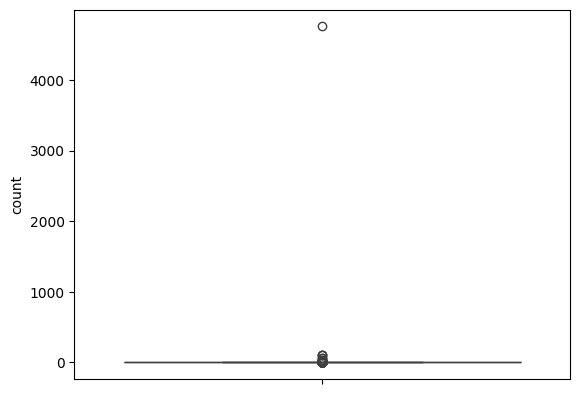

In [36]:
sns.boxplot(data=all_data_outcome['temp'].value_counts())

In [139]:
all_data_outcome['temp'][(all_data_outcome['trailOutcome']=='Terminated, Poor enrollment')].value_counts()[:20]

temp
poor enrollment                                                                                                                                                 3176
see termination reason in detailed description                                                                                                                    22
see detailed description                                                                                                                                           7
please see detailed description for termination reason                                                                                                             4
see detailed description for termination reason                                                                                                                    2
business decision                                                                                                                                                  2
poor 

temp
poor enrollment                                                                                                                                                      15761
poor funding                                                                                                                                                           397
sponsor decision                                                                                                                                                       353
business decision                                                                                                                                                      177
see termination reason in detailed description                                                                                                                         150
                                                                                                                                            

/tmp/ipykernel_3168534/396602406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  why_stoppde['temp'] = why_stoppde['why_stopped'].apply(why_stopped_re)


<Axes: ylabel='count'>

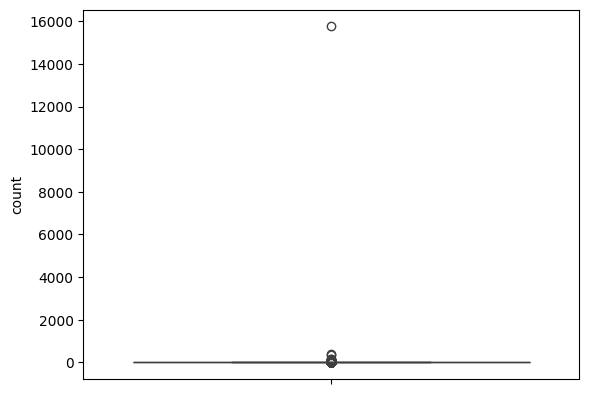

In [38]:
why_stoppde['temp'] = why_stoppde['why_stopped'].apply(why_stopped_re)
print(why_stoppde['temp'].value_counts())
sns.boxplot(data=why_stoppde['temp'].value_counts())

In [20]:
city_num = {}
city_y = {}
for index, citys, y in all_data_outcome[['location/facility/address/city', 'trailOutcome']].itertuples():
    if type(citys) == list:
        citys = eval(citys)
        for city in citys:
            city = city.lower()
            if city in city_num.keys():
                city_num[city] += 1
                city_y[city].append(y)
            else:
                city_num[city] = 1
                city_y[city] = [y]
    elif type(citys) == str and citys[0] != '[':
        citys = citys.lower()
        if citys in city_num.keys():
            city_num[citys] += 1
            city_y[citys].append(y)
        else:
            city_num[citys] = 1
            city_y[citys] = [y]     
    elif type(citys) == str and citys[0] == '[':
        citys = eval(citys)
        for city in citys:
            city = city.lower()
            if city in city_num.keys():
                city_num[city] += 1
                city_y[city].append(y)
            else:
                city_num[city] = 1
                city_y[city] = [y]

print(len(city_num))
print(sorted(city_num, key=lambda x: x[1], reverse=False))

32533
['s fermo della battaglia', 'n charleston', 'n novgorod n/a', 'n miami beach', 'a coruna', 'a coruña', 'e cape', 's portland', 'e syracuse', 'n richland hills', 'w palm beach', 'e 8-74, groote schuur hospital, observatory cape town', 'o fallon', 's hertogenbosch', 's burlington', '9 de julio', 'l hospitalet de llobregat', 'o barco de valdeorras', 'n dartmouth', 'w yarmouth', 's gravenzande', 'f cayco sampaloc, manila', 'a corunna', '1 st. georgi sofiysky st', '1 hristo smirnensky st', '2 nezavisimost st', '1 3rd -transportnaya str., omsk', '1 severny pr., st.petersburg', '1 truda str., izhevsk', '2 "b" salyama adilya str., moscow', '3 pirogova str., petrozavodsk, ,', '4 shkuleva str., moscow', '4 solidarnosti pr., st. petersburg', '5 uchebny per., st. petersburg', '6 kuratova str., 167981', '6 pavlova str., building 4, murmansk', '6 zalesskogo str., novosibirsk', '7 kluchevskaya str., ekaterinburg', '9 artema str., stavropol', 'n novgorod na', 'c a b a', 'a coruã±a', 's maria cap

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcbd2884160>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcbd28846a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcbd2876e80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcbd2884be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcbd2884e80>],
 'means': []}

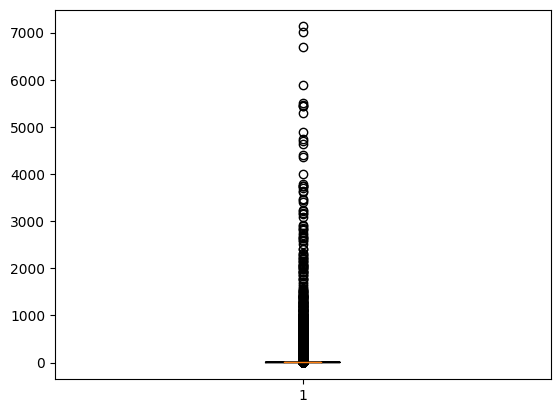

In [30]:
plt.boxplot(x=city_num.values(), notch=True)

In [26]:
city_neg_percent = {}
for city in city_num.keys():
    city_neg_percent[city] = city_y[city].count('Terminated, Poor enrollment')/city_num[city]
    # print(city, city_y[city].count(False)/city_num[city])
sorted(city_neg_percent, key=lambda x: x[1], reverse=True)
city_neg_percent

{'charleston': 0.05116696588868941,
 'minneapolis': 0.07139545665275845,
 'birmingham': 0.033093141179610354,
 'scottsdale': 0.04466019417475728,
 'berkeley': 0.04888888888888889,
 'los angeles': 0.050119331742243436,
 'oceanside': 0.01627906976744186,
 'orange': 0.045207956600361664,
 'san diego': 0.026963657678780773,
 'denver': 0.06072041166380789,
 'hamden': 0.022900763358778626,
 'new haven': 0.03690036900369004,
 'ocala': 0.01592920353982301,
 'orlando': 0.033568172399502695,
 'sarasota': 0.0234375,
 'st. petersburg': 0.007015902712815715,
 'west palm beach': 0.021111111111111112,
 'chicago': 0.06779039941370466,
 'peoria': 0.08333333333333333,
 'indianapolis': 0.048814998231340646,
 'baltimore': 0.057042443903757775,
 'boston': 0.07006252298639205,
 'wellesley hills': 0.0,
 'worcester': 0.04119850187265917,
 'dearborn': 0.08461538461538462,
 'grand rapids': 0.08070175438596491,
 'st. paul': 0.05128205128205128,
 'st. louis': 0.04812398042414356,
 'omaha': 0.05101649405446874,
 '

In [31]:
disease_num = {}
disease_y = {}
for index, diseases, y in all_data_outcome[['condition', 'trailOutcome']].itertuples():
    if type(diseases) == list:
        diseases = eval(diseases)
        for disease in diseases:
            disease = disease.lower()
            if disease in disease_num.keys():
                disease_num[disease] += 1
                disease_y[disease].append(y)
            else:
                disease_num[disease] = 1
                disease_y[disease] = [y]
    elif type(diseases) == str and diseases[0] != '[':
        diseases = diseases.lower()
        if diseases in disease_num.keys():
            disease_num[diseases] += 1
            disease_y[diseases].append(y)
        else:
            disease_num[diseases] = 1
            disease_y[diseases] = [y]     
    elif type(diseases) == str and diseases[0] == '[':
        diseases = eval(diseases)
        for disease in diseases:
            disease = disease.lower()
            if disease in disease_num.keys():
                disease_num[disease] += 1
                disease_y[disease].append(y)
            else:
                disease_num[disease] = 1
                disease_y[disease] = [y]

print(len(disease_num))
print(sorted(disease_num, key=lambda x: x[1], reverse=False))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcbd25a3880>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcbd25a3dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcbd25a35e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcbd2532340>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcbd25325e0>],
 'means': []}

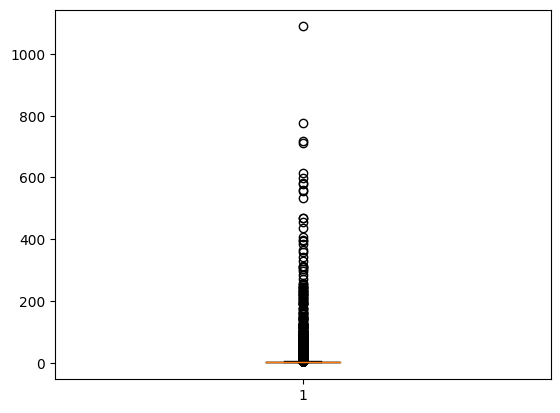

In [32]:
plt.boxplot(x=disease_num.values())

In [35]:
disease_neg_percent = {}
for disease in disease_num.keys():
    disease_neg_percent[disease] = disease_y[disease].count('Terminated, Poor enrollment')/disease_num[disease]
    # print(disease, disease_y[disease].count(False)/disease_num[disease])
sorted(disease_neg_percent, key=lambda x: x[1], reverse=True)
disease_neg_percent

{'congenital adrenal hyperplasia': 0.0,
 'cancer': 0.07828282828282829,
 'alzheimer disease': 0.06172839506172839,
 'cognition disorders': 0.125,
 'mood disorders': 0.0,
 'cocaine-related disorders': 0.0,
 'schizophrenia': 0.07426597582037997,
 'depression': 0.1210762331838565,
 'systemic lupus erythematosus': 0.07142857142857142,
 'osteopenia': 0.1111111111111111,
 'osteoporosis': 0.05755395683453238,
 'asthma': 0.042416452442159386,
 'lung diseases': 0.06666666666666667,
 'cardiovascular diseases': 0.14035087719298245,
 'heart diseases': 0.14285714285714285,
 'peripheral vascular diseases': 0.1111111111111111,
 'thromboembolism': 0.14285714285714285,
 'vascular diseases': 0.0,
 'venous thromboembolism': 0.09302325581395349,
 'atherosclerosis': 0.0625,
 'hypercholesterolemia': 0.03463203463203463,
 'hypertension': 0.07526881720430108,
 'diabetes mellitus, type 2': 0.03506311360448808,
 'diabetes mellitus': 0.038834951456310676,
 'coronary disease': 0.08571428571428572,
 'lymphoma, non

============================================================================

===================================================

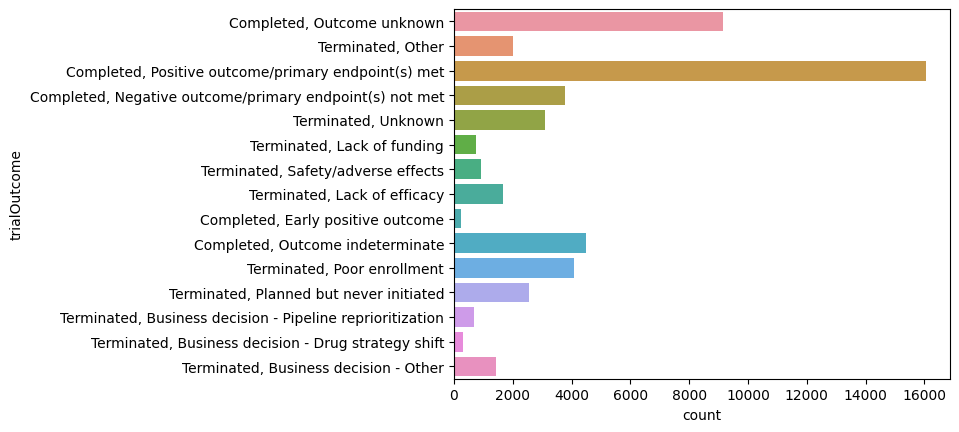

In [200]:
outcomes['trialOutcome'].value_counts()
ax = sns.countplot(y='trialOutcome', data=outcomes)
plt.show()

In [44]:
raw_data_path = '../AllPublicXML/'
chosen_nctids = list(outcomes.index)
xml_paths = [raw_data_path + nctid[:7] + 'xxxx/' + nctid + '.xml' for nctid in chosen_nctids]
xml_paths

['/Users/fengyuan/Downloads/AllPublicXML/NCT0000xxxx/NCT00000102.xml',
 '/Users/fengyuan/Downloads/AllPublicXML/NCT0000xxxx/NCT00000105.xml',
 '/Users/fengyuan/Downloads/AllPublicXML/NCT0000xxxx/NCT00000172.xml',
 '/Users/fengyuan/Downloads/AllPublicXML/NCT0000xxxx/NCT00000173.xml',
 '/Users/fengyuan/Downloads/AllPublicXML/NCT0000xxxx/NCT00000174.xml',
 '/Users/fengyuan/Downloads/AllPublicXML/NCT0000xxxx/NCT00000175.xml',
 '/Users/fengyuan/Downloads/AllPublicXML/NCT0000xxxx/NCT00000340.xml',
 '/Users/fengyuan/Downloads/AllPublicXML/NCT0000xxxx/NCT00000372.xml',
 '/Users/fengyuan/Downloads/AllPublicXML/NCT0000xxxx/NCT00000390.xml',
 '/Users/fengyuan/Downloads/AllPublicXML/NCT0000xxxx/NCT00000419.xml',
 '/Users/fengyuan/Downloads/AllPublicXML/NCT0000xxxx/NCT00000430.xml',
 '/Users/fengyuan/Downloads/AllPublicXML/NCT0000xxxx/NCT00000577.xml',
 '/Users/fengyuan/Downloads/AllPublicXML/NCT0000xxxx/NCT00000614.xml',
 '/Users/fengyuan/Downloads/AllPublicXML/NCT0000xxxx/NCT00000620.xml',
 '/Use

#### 读取xml, 提取信息到csv

In [644]:
tree = ET.parse('/Users/fengyuan/Downloads/AllPublicXML/NCT0356xxxx/NCT03569748.xml')
root = tree.getroot()
enroll = root.find('enrollment')
print(enroll.attrib)

{'type': 'Actual'}


In [652]:
All_data_sub['why_stopped'][All_data_sub['Y']==False].value_counts()

why_stopped
\n    Slow accrual\r\n                                                                                     108
\n    slow accrual\r\n                                                                                      61
\n    low accrual\r\n                                                                                       58
\n    Low accrual\r\n                                                                                       48
\n    Slow Accrual\r\n                                                                                      43
                                                                                                          ... 
\n    The study was stopped due to insufficient enrollment.\r\n                                              1
\n    Patient population no longer available.\r\n                                                            1
\n    No subjects were enrolled\r\n                                                                 

In [118]:
def walkData(root_node, prefix, result):
	'''
	递归读取xml中所有特征
	'''
	k = prefix + '/' + root_node.tag
	v = root_node.text
	if (v is not None) and (v.strip('\n').strip('\r').strip() != '') :
		k = k.replace('/clinical_study/', '')
		if k  not in result.keys():
			result[k] = [v]
		else:
			result[k].append(v)

	children_node = list(root_node)
	if len(children_node) == 0:
		return
	for child in children_node:
		walkData(child, prefix = prefix + '/' + root_node.tag, result = result)


In [127]:
def strip_list(lis):
    '''
    '''
    if len(lis) > 1:
        return lis
    else:
        return lis[0]

缺少的部分是 nctid被修改了 能找到修改后对应的

In [643]:
# All_data = pd.DataFrame()
for path in xml_paths:
    result = {}
    # try:
    if os.path.exists(path):
        tree = ET.parse(path)
        root = tree.getroot()
        walkData(root, prefix = '', result = result)
        values = [strip_list(v) for v in result.values()]
        ser = pd.Series(values, index=result.keys(), name=str(result['id_info/nct_id'][0]))
    else:
        print(f'{path} is not exists!' )
        ser = pd.Series(name=path[-15:-4])

    print(path, len(list(All_data.columns)))
    All_data = pd.concat([All_data, pd.DataFrame(ser).T])
    print(str(result['id_info/nct_id'][0]), len(list(All_data.columns)))

KeyboardInterrupt: 

In [254]:
All_data['trailOutcome'] = outcomes['trialOutcome']
All_data

,required_header/download_date,required_header/link_text,required_header/url,id_info/org_study_id,id_info/secondary_id,id_info/nct_id,brief_title,sponsors/lead_sponsor/agency,sponsors/lead_sponsor/agency_class,source,...,clinical_results/outcome_list/outcome/analysis_list/analysis/ci_upper_limit_na_comment,eligibility/gender_based,target_duration,eligibility/gender_description,expanded_access_info/expanded_access_type_individual,oversight_info/is_unapproved_device,expanded_access_info/expanded_access_type_treatment,clinical_results/baseline/measure_list/measure/analyzed_list/analyzed/units,clinical_results/baseline/measure_list/measure/analyzed_list/analyzed/scope,trailOutcome
NCT00000102,ClinicalTrials.gov processed this data on Febr...,Link to the current ClinicalTrials.gov record.,https://clinicaltrials.gov/ct2/show/NCT00000102,NCRR-M01RR01070-0506,M01RR001070,NCT00000102,Congenital Adrenal Hyperplasia: Calcium Channe...,National Center for Research Resources (NCRR),NIH,National Center for Research Resources (NCRR),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Completed, Outcome unknown"
NCT00000105,ClinicalTrials.gov processed this data on Febr...,Link to the current ClinicalTrials.gov record.,https://clinicaltrials.gov/ct2/show/NCT00000105,2002LS032,MT1999-06,NCT00000105,Vaccination With Tetanus and KLH to Assess Imm...,"Masonic Cancer Center, University of Minnesota",Other,"Masonic Cancer Center, University of Minnesota",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Terminated, Other"
NCT00000172,ClinicalTrials.gov processed this data on Febr...,Link to the current ClinicalTrials.gov record.,https://clinicaltrials.gov/ct2/show/NCT00000172,IA0009,NaN,NCT00000172,Evaluation of Galantamine in the Treatment of ...,"Janssen, LP",Industry,National Institute on Aging (NIA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Completed, Positive outcome/primary endpoint(s..."
NCT00000173,ClinicalTrials.gov processed this data on Febr...,Link to the current ClinicalTrials.gov record.,https://clinicaltrials.gov/ct2/show/NCT00000173,IA0011,3U01AG010483-08S2,NCT00000173,Memory Impairment Study (Mild Cognitive Impair...,National Institute on Aging (NIA),NIH,National Institute on Aging (NIA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Completed, Positive outcome/primary endpoint(s..."
NCT00000174,ClinicalTrials.gov processed this data on Febr...,Link to the current ClinicalTrials.gov record.,https://clinicaltrials.gov/ct2/show/NCT00000174,IA0012,NaN,NCT00000174,Investigation Into Delay to Diagnosis of Alzhe...,Novartis,Industry,National Institute on Aging (NIA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Completed, Negative outcome/primary endpoint(s..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCT03733301,ClinicalTrials.gov processed this data on Febr...,Link to the current ClinicalTrials.gov record.,https://clinicaltrials.gov/ct2/show/NCT03733301,17100,"['I4V-MC-JAIY', '2018-001726-26']",NCT03733301,A Study of Baricitinib (LY3009104) in Combinat...,Eli Lilly and Company,Industry,Eli Lilly and Company,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Completed, Positive outcome/primary endpoint(s..."
NCT03733574,ClinicalTrials.gov processed this data on Febr...,Link to the current ClinicalTrials.gov record.,https://clinicaltrials.gov/ct2/show/NCT03733574,LY03005/CT-USA-106,NaN,NCT03733574,A Study of LY03005 vs Pristiq,Luye Pharma Group Ltd.,Industry,Luye Pharma Group Ltd.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Completed, Outcome unknown"
NCT03735446,ClinicalTrials.gov processed this data on Febr...,Link to the current ClinicalTrials.gov record.,https://clinicaltrials.gov/ct2/show/NCT03735446,18-468,NaN,NCT03735446,Prexasertib in Combination With MEC in Relapse...,Dana-Farber Cancer Institute,Other,Dana-Farber Cancer Institute,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Terminated, Business decision - Other"
NCT03736044,ClinicalTrials.gov processed this data on Febr...,Link to the current ClinicalTrials.gov record.,https://cl

In [255]:
# required_header为nan时 xml文件缺失 共32个
All_data = All_data[~All_data['required_header/download_date'].isna()]

### 筛选特征：

1、除去数量太少的，不为nan少于500条的

2、除去requierd_head下属节点

3、

In [135]:
import numpy as np

In [141]:
col_num = {}
for col in All_data.columns:
    col_num[col] = (~All_data[col].isna()).sum()
    print(col, (~All_data[col].isna()).sum())

required_header/download_date 51259
required_header/link_text 51259
required_header/url 51259
id_info/org_study_id 51257
id_info/secondary_id 18284
id_info/nct_id 51259
brief_title 51259
sponsors/lead_sponsor/agency 51259
sponsors/lead_sponsor/agency_class 51259
source 51259
brief_summary/textblock 51259
detailed_description/textblock 29106
overall_status 51259
phase 48254
study_type 51259
has_expanded_access 50253
study_design_info/intervention_model 47378
study_design_info/primary_purpose 47607
study_design_info/masking 47721
condition 51257
intervention/intervention_type 50175
intervention/intervention_name 50175
eligibility/criteria/textblock 51246
eligibility/gender 51258
eligibility/minimum_age 51258
eligibility/maximum_age 51258
eligibility/healthy_volunteers 50926
location/facility/name 41109
location/facility/address/city 45371
location/facility/address/state 32657
location/facility/address/country 45371
location_countries/country 45371
verification_date 51259
study_first_subm

In [244]:
# 少于500条的特征和required_head
drop_col = [k for k,v in col_num.items() if v < 500 or 'required_head' in k ]
drop_col

['required_header/download_date',
 'required_header/link_text',
 'required_header/url',
 'biospec_retention',
 'biospec_descr/textblock',
 'clinical_results/reported_events/serious_events/category_list/category/event_list/event/assessment',
 'clinical_results/outcome_list/outcome/analysis_list/analysis/other_analysis_desc',
 'clinical_results/baseline/measure_list/measure/units_analyzed',
 'clinical_results/baseline/measure_list/measure/class_list/class/category_list/category/measurement_list/measurement',
 'location/contact/phone_ext',
 'overall_contact/phone_ext',
 'location/contact_backup/phone',
 'location/contact_backup/email',
 'pending_results/submission_canceled',
 'clinical_results/outcome_list/outcome/measure/units_analyzed',
 'overall_contact_backup/phone_ext',
 'clinical_results/outcome_list/outcome/posting_date',
 'expanded_access_info/expanded_access_type_intermediate',
 'location/contact_backup/phone_ext',
 'clinical_results/outcome_list/outcome/analysis_list/analysis/ci

In [257]:
All_data = All_data[[k for k in All_data.columns if  k not in drop_col]]

In [259]:
All_data.to_csv('All_data.csv')
All_data

,id_info/org_study_id,id_info/secondary_id,id_info/nct_id,brief_title,sponsors/lead_sponsor/agency,sponsors/lead_sponsor/agency_class,source,brief_summary/textblock,detailed_description/textblock,overall_status,...,patient_data/ipd_info_type,patient_data/ipd_time_frame,patient_data/ipd_url,overall_contact_backup/phone,overall_contact_backup/email,clinical_results/baseline/measure_list/measure/class_list/class/analyzed_list/analyzed/units,clinical_results/baseline/measure_list/measure/class_list/class/analyzed_list/analyzed/scope,clinical_results/baseline/measure_list/measure/population,patient_data/ipd_access_criteria,trailOutcome
NCT00000102,NCRR-M01RR01070-0506,M01RR001070,NCT00000102,Congenital Adrenal Hyperplasia: Calcium Channe...,National Center for Research Resources (NCRR),NIH,National Center for Research Resources (NCRR),\n This study will test the ability of ex...,\n This protocol is designed to assess bo...,Completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Completed, Outcome unknown"
NCT00000105,2002LS032,MT1999-06,NCT00000105,Vaccination With Tetanus and KLH to Assess Imm...,"Masonic Cancer Center, University of Minnesota",Other,"Masonic Cancer Center, University of Minnesota",\n The purpose of this study is to learn ...,\n Patients will receive each vaccine onc...,Terminated,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Terminated, Other"
NCT00000172,IA0009,NaN,NCT00000172,Evaluation of Galantamine in the Treatment of ...,"Janssen, LP",Industry,National Institute on Aging (NIA),\n Galantamine is an experimental drug be...,\n After a 1-month single-blind run in ph...,Completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Completed, Positive outcome/primary endpoint(s..."
NCT00000173,IA0011,3U01AG010483-08S2,NCT00000173,Memory Impairment Study (Mild Cognitive Impair...,National Institute on Aging (NIA),NIH,National Institute on Aging (NIA),\n The National Institute on Aging (NIA) ...,\n This clinical trial will be a multicen...,Completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Completed, Positive outcome/primary endpoint(s..."
NCT00000174,IA0012,NaN,NCT00000174,Investigation Into Delay to Diagnosis of Alzhe...,Novartis,Industry,National Institute on Aging (NIA),\n This phase IIIb trial is a prospective...,NaN,Completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Completed, Negative outcome/primary endpoint(s..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCT03733301,17100,"['I4V-MC-JAIY', '2018-001726-26']",NCT03733301,A Study of Baricitinib (LY3009104) in Combinat...,Eli Lilly and Company,Industry,Eli Lilly and Company,\n The purpose of this study is to evalua...,NaN,Completed,...,"['Study Protocol', 'Statistical Analysis Plan ...",Data are available 6 months after the primary ...,https://vivli.org/,NaN,NaN,NaN,NaN,NaN,A research proposal must be approved by an ind...,"Completed, Positive outcome/primary endpoint(s..."
NCT03733574,LY03005/CT-USA-106,NaN,NCT03733574,A Study of LY03005 vs Pristiq,Luye Pharma Group Ltd.,Industry,Luye Pharma Group Ltd.,\n The objective of this study is to eval...,\n Fifty six (56) eligible subjects will ...,Completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Completed, Outcome unknown"
NCT03735446,18-468,NaN,NCT03735446,Prexasertib in Combination With MEC in Relapse...,Dana-Farber Cancer Institute,Other,Dana-Farber Cancer Institute,\n This research study is studying a targ...,\n This research study is a Phase I clini...,Terminated,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Terminated, Business decision - Other"
NCT03736044,PRUa1GR-2013 -00000156,NaN,NCT03736044,Reconstitution of CD4+CD25highCD127low/-Tcell,University Hospital of Ferrara,Other,University Hospital of Ferrara,\n Rheumatoid arthritis (RA) is a systemi...,\n 1. To evaluate the incidence of diseas...,Completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Completed, Outcome unknown"


### 分析

In [301]:
from sklearn.metrics.cluster import entropy, mutual_info_score, normalized_mutual_info_score, adjusted_mutual_info_score

MI = lambda x, y: mutual_info_score(x, y)
NMI = lambda x, y: normalized_mutual_info_score(x, y, average_method='arithmetic')
AMI = lambda x, y: adjusted_mutual_info_score(x, y, average_method='arithmetic')

<Axes: xlabel='count', ylabel='trailOutcome'>

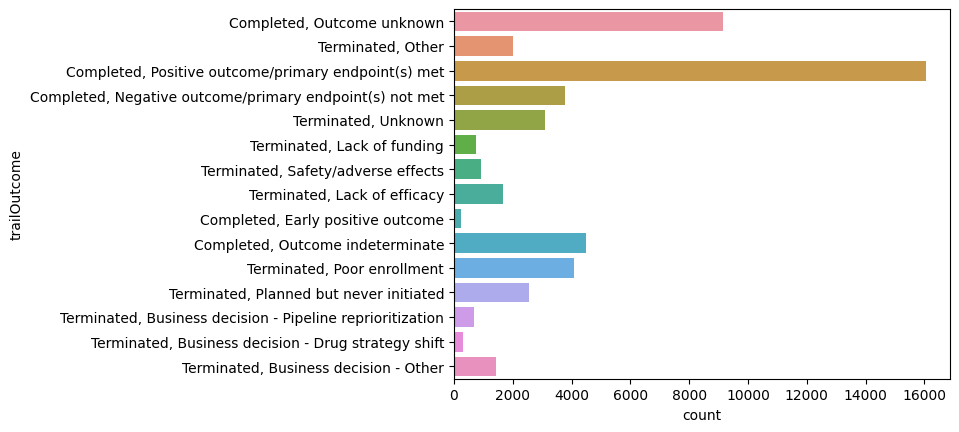

In [307]:
sns.countplot(data=All_data, y='trailOutcome')

negative: Terminated, pool enrollment;  

positive: All completed; 

In [586]:
## completed 里的 p-n
def Choose_completed_positive(value):
    if 'Completed' in value and 'positive' in value.lower():
        return 'Completed_positive'
    elif 'Completed' in value and 'negative' in value.lower():
        return 'Completed_negative'
    elif 'Poor enrollment' in value:
        return 'Poor enrollment'
    elif 'Completed' in value:
        return 'Completed, other'
    else:
        return 'Terminated, other'

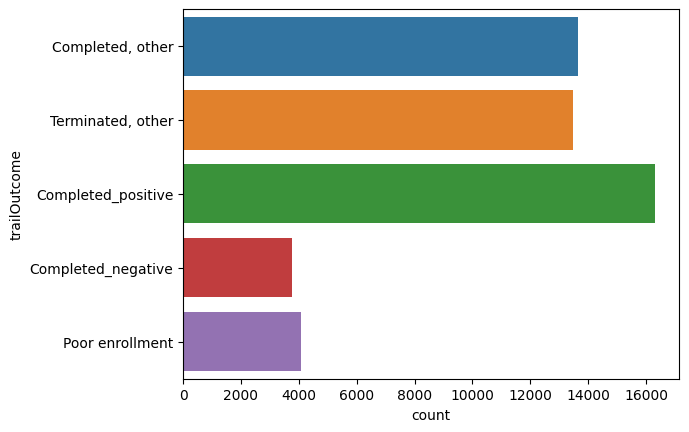

In [588]:
trailOutcome = All_data['trailOutcome'].apply(Choose_completed_positive)
trailOutcome = pd.DataFrame(trailOutcome)
trailOutcome['trailOutcome'].value_counts()
sns.countplot(data=trailOutcome, y='trailOutcome')
plt.show()

In [308]:
def Choose_positive(value):
    if 'Completed' in value:
        return True
    elif 'Poor enrollment' in value:
        return False
    else:
        return np.nan

In [310]:
All_data['Y'] = All_data['trailOutcome'].apply(Choose_positive)
All_data

/var/folders/gj/fgl492zn5lngy1_gzbnc70880000gp/T/ipykernel_28051/84370300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_data['Y'] = All_data['trailOutcome'].apply(Choose_positive)


,id_info/org_study_id,id_info/secondary_id,id_info/nct_id,brief_title,sponsors/lead_sponsor/agency,sponsors/lead_sponsor/agency_class,source,brief_summary/textblock,detailed_description/textblock,overall_status,...,patient_data/ipd_time_frame,patient_data/ipd_url,overall_contact_backup/phone,overall_contact_backup/email,clinical_results/baseline/measure_list/measure/class_list/class/analyzed_list/analyzed/units,clinical_results/baseline/measure_list/measure/class_list/class/analyzed_list/analyzed/scope,clinical_results/baseline/measure_list/measure/population,patient_data/ipd_access_criteria,trailOutcome,Y
NCT00000102,NCRR-M01RR01070-0506,M01RR001070,NCT00000102,Congenital Adrenal Hyperplasia: Calcium Channe...,National Center for Research Resources (NCRR),NIH,National Center for Research Resources (NCRR),\n This study will test the ability of ex...,\n This protocol is designed to assess bo...,Completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Completed, Outcome unknown",True
NCT00000105,2002LS032,MT1999-06,NCT00000105,Vaccination With Tetanus and KLH to Assess Imm...,"Masonic Cancer Center, University of Minnesota",Other,"Masonic Cancer Center, University of Minnesota",\n The purpose of this study is to learn ...,\n Patients will receive each vaccine onc...,Terminated,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Terminated, Other",NaN
NCT00000172,IA0009,NaN,NCT00000172,Evaluation of Galantamine in the Treatment of ...,"Janssen, LP",Industry,National Institute on Aging (NIA),\n Galantamine is an experimental drug be...,\n After a 1-month single-blind run in ph...,Completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Completed, Positive outcome/primary endpoint(s...",True
NCT00000173,IA0011,3U01AG010483-08S2,NCT00000173,Memory Impairment Study (Mild Cognitive Impair...,National Institute on Aging (NIA),NIH,National Institute on Aging (NIA),\n The National Institute on Aging (NIA) ...,\n This clinical trial will be a multicen...,Completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Completed, Positive outcome/primary endpoint(s...",True
NCT00000174,IA0012,NaN,NCT00000174,Investigation Into Delay to Diagnosis of Alzhe...,Novartis,Industry,National Institute on Aging (NIA),\n This phase IIIb trial is a prospective...,NaN,Completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Completed, Negative outcome/primary endpoint(s...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCT03733301,17100,"['I4V-MC-JAIY', '2018-001726-26']",NCT03733301,A Study of Baricitinib (LY3009104) in Combinat...,Eli Lilly and Company,Industry,Eli Lilly and Company,\n The purpose of this study is to evalua...,NaN,Completed,...,Data are available 6 months after the primary ...,https://vivli.org/,NaN,NaN,NaN,NaN,NaN,A research proposal must be approved by an ind...,"Completed, Positive outcome/primary endpoint(s...",True
NCT03733574,LY03005/CT-USA-106,NaN,NCT03733574,A Study of LY03005 vs Pristiq,Luye Pharma Group Ltd.,Industry,Luye Pharma Group Ltd.,\n The objective of this study is to eval...,\n Fifty six (56) eligible subjects will ...,Completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Completed, Outcome unknown",True
NCT03735446,18-468,NaN,NCT03735446,Prexasertib in Combination With MEC in Relapse...,Dana-Farber Cancer Institute,Other,Dana-Farber Cancer Institute,\n This research study is studying a targ...,\n This research study is a Phase I clini...,Terminated,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Terminated, Business decision - Other",NaN
NCT03736044,PRUa1GR-2013 -00000156,NaN,NCT03736044,Reconstitution of CD4+CD25highCD127low/-Tcell,University Hospital of Ferrara,Other,University Hospital of Ferrara,\n Rheumatoid arthritis (RA) is a systemi...,\n 1. To evaluate the incidence of diseas...,Completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Completed, Outcome unknown",True


In [314]:
# 只分析了类别确定的
All_data_sub = All_data[~All_data['Y'].isna()]

brief_title 、detailed_description/textblock official_title why_stopped 文本

In [479]:
print('brief_title', All_data_sub['brief_title'].isna().sum())
print('detailed_description/textblock', All_data_sub['detailed_description/textblock'].isna().sum())
print('official_title', All_data_sub['official_title'].isna().sum())
print('why_stopped', All_data_sub['why_stopped'].isna().sum())
print('secondary_outcome/description', All_data_sub['secondary_outcome/description'].isna().sum())
print('primary_outcome/description', All_data_sub['primary_outcome/description'].isna().sum())
print('intervention/description', All_data_sub['intervention/description'].isna().sum())
print('arm_group/description', All_data_sub['arm_group/description'].isna().sum())

brief_title 0
detailed_description/textblock 16959
official_title 712
why_stopped 34002
secondary_outcome/description 14867
primary_outcome/description 12165
intervention/description 6669
arm_group/description 8927


In [470]:
All_data_sub['intervention/description'].value_counts()

intervention/description
['oral', 'oral']                                                                                                                                                                                                                                                                                                                                                                                                         53
oral                                                                                                                                                                                                                                                                                                                                                                                                                     46
Given IV                                                                                                                                               

sponsor

In [508]:
All_data_sub['sponsors/collaborator/agency_class'].isna().sum()

25333

In [507]:
agency_class_num = {}
agency_class_y = {}
for index, agency_classs, y in All_data_sub[['sponsors/collaborator/agency_class', 'Y']].itertuples():
    if type(agency_classs) == list:
        agency_classs = eval(agency_classs)
        for agency_class in agency_classs:
            agency_class = agency_class.lower()
            if agency_class in agency_class_num.keys():
                agency_class_num[agency_class] += 1
                agency_class_y[agency_class].append(y)
            else:
                agency_class_num[agency_class] = 1
                agency_class_y[agency_class] = [y]
    elif type(agency_classs) == str and agency_classs[0] != '[':
        agency_classs = agency_classs.lower()
        if agency_classs in agency_class_num.keys():
            agency_class_num[agency_classs] += 1
            agency_class_y[agency_classs].append(y)
        else:
            agency_class_num[agency_classs] = 1
            agency_class_y[agency_classs] = [y]     
    elif type(agency_classs) == str and agency_classs[0] == '[':
        agency_classs = eval(agency_classs)
        for agency_class in agency_classs:
            agency_class = agency_class.lower()
            if agency_class in agency_class_num.keys():
                agency_class_num[agency_class] += 1
                agency_class_y[agency_class].append(y)
            else:
                agency_class_num[agency_class] = 1
                agency_class_y[agency_class] = [y]
     
agency_class_percent = {}
for k in agency_class_num.keys():
    agency_class_percent[k] = agency_class_y[k].count(False) / agency_class_num[k]
sorted(agency_class_percent.items(), key=lambda x: x[1], reverse=True)

[('nih', 0.21372446306967),
 ('other', 0.12548123195380173),
 ('industry', 0.11237987563595252),
 ('u.s. fed', 0.10612244897959183)]

In [505]:
All_data_sub['sponsors/collaborator/agency'].value_counts()

sponsors/collaborator/agency
National Cancer Institute (NCI)                                       845
Pfizer                                                                250
Merck Sharp & Dohme LLC                                               234
GlaxoSmithKline                                                       233
Genentech, Inc.                                                       204
                                                                     ... 
Altmarc Inc.                                                            1
['Dana-Farber Cancer Institute', 'Infinity Pharmaceuticals, Inc.']      1
['Merck Sharp & Dohme LLC', 'CIHR Canadian HIV Trials Network']         1
['Amgen', 'WiSP Wissenschaftlicher Service Pharma GmbH']                1
Gnosis SpA                                                              1
Name: count, Length: 5117, dtype: int64

In [315]:
All_data_sub['sponsors/lead_sponsor/agency'].value_counts()

sponsors/lead_sponsor/agency
GlaxoSmithKline                             1174
Novartis Pharmaceuticals                     886
Hoffmann-La Roche                            858
AstraZeneca                                  791
Pfizer                                       744
                                            ... 
Prof. Dr. Med. Laimonas Griskevicius           1
Kevin Gray, MD                                 1
Attabib, Najmedden, M.D.                       1
Agence de Médecine Préventive, France          1
Azienda di Servizi alla Persona di Pavia       1
Name: count, Length: 6131, dtype: int64

<Axes: xlabel='sponsors/lead_sponsor/agency_class', ylabel='count'>

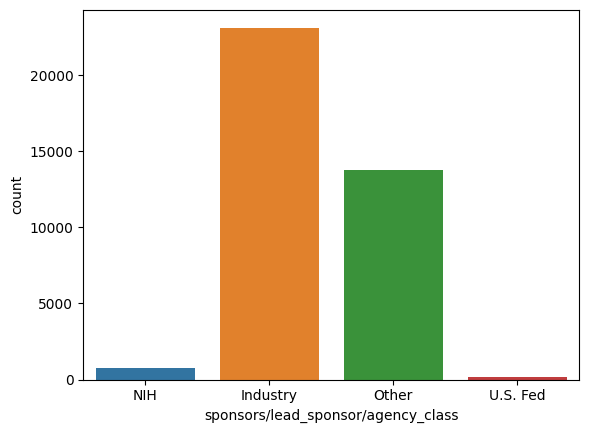

In [316]:
sns.countplot(data=All_data_sub, x='sponsors/lead_sponsor/agency_class')

In [317]:
NMI(All_data_sub['sponsors/lead_sponsor/agency_class'].astype('category').cat.codes, All_data_sub['Y'].astype('category').cat.codes )

0.05337084177409542

overall_status 和标签意义有点相似Completed与approved for marketing之类是否有包含关系？

In [319]:
NMI(All_data_sub['overall_status'].astype('category').cat.codes, All_data_sub['Y'].astype('category').cat.codes )

0.4575081753080314

In [321]:
All_data_sub['overall_status'].value_counts()

overall_status
Completed                  31325
Terminated                  3525
Unknown status              1882
Withdrawn                    546
Active, not recruiting       394
No longer available           54
Approved for marketing        35
Recruiting                    21
Suspended                     13
Enrolling by invitation        3
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='overall_status'>

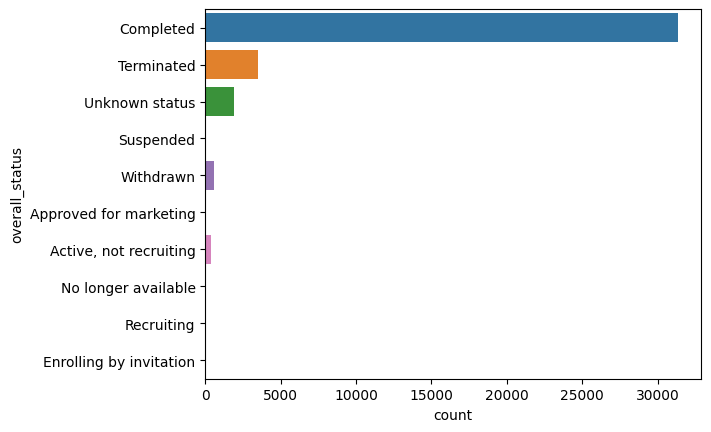

In [320]:
sns.countplot(data=All_data_sub, y='overall_status')

phase

In [322]:
All_data_sub['phase'].value_counts()

phase
Phase 2            11349
Phase 3             9213
Phase 4             4800
Phase 1             4728
Phase 1/Phase 2     2089
Phase 2/Phase 3      683
Early Phase 1        169
Name: count, dtype: int64

In [298]:
All_data_sub['phase'].isna().sum() 

6438

<Axes: xlabel='count', ylabel='phase'>

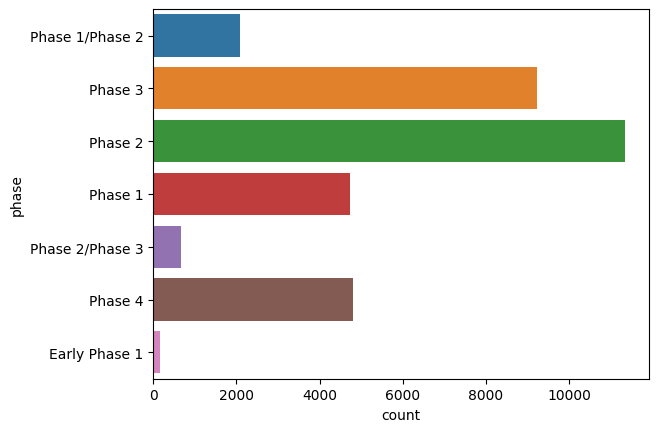

In [348]:
sns.countplot(data=All_data_sub, y='phase')

In [325]:
# 计算phase不为nan的部分
NMI(All_data_sub[~All_data_sub['phase'].isna()]['phase'].astype('category').cat.codes, All_data_sub[~All_data_sub['phase'].isna()]['Y'].astype('category').cat.codes )

0.005432554176674

study_type

In [347]:
All_data_sub['study_type'].value_counts()

study_type
Interventional                      35316
Observational                        2303
Observational [Patient Registry]       90
Expanded Access                        89
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='study_type'>

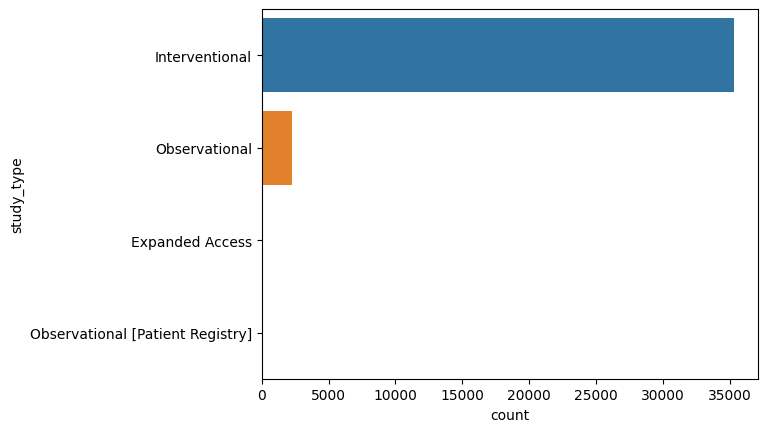

In [350]:
sns.countplot(data=All_data_sub, y='study_type')

In [351]:
NMI(All_data_sub['study_type'].astype('category').cat.codes, All_data_sub['Y'].astype('category').cat.codes )

0.0031950323711694376

has_expanded_access

In [352]:
All_data_sub['has_expanded_access'].value_counts()

has_expanded_access
No     37050
Yes      208
Name: count, dtype: int64

In [354]:
NMI(All_data_sub['has_expanded_access'].astype('category').cat.codes, All_data_sub['Y'].astype('category').cat.codes )

0.0009401221700547489

study_design_info :

intervention_model,

primary_purpose, 

masking,

masking_description 文本, 空值大于3万

intervention_model_description 文本, 空值大于3万

study_design_info/observational_model 


In [355]:
All_data_sub['study_design_info/intervention_model'].value_counts() # one hot

study_design_info/intervention_model
Parallel Assignment        20929
Single Group Assignment    11111
Crossover Assignment        2186
Sequential Assignment        332
Factorial Assignment         276
Name: count, dtype: int64

study_design_info/allocation
NAN数量: 10910


NMI:  0.0010123843531940314


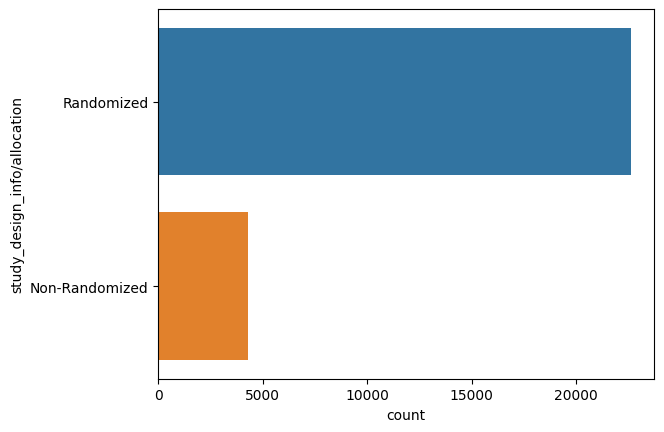

study_design_info/allocation
Randomized        22591
Non-Randomized     4297
Name: count, dtype: int64

In [495]:
feature_name = 'study_design_info/allocation'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
print('NMI: ', NMI(All_data_sub[~All_data_sub[feature_name].isna()][feature_name].astype('category').cat.codes, All_data_sub[~All_data_sub[feature_name].isna()]['Y'].astype('category').cat.codes))
sns.countplot(data=All_data_sub, y=feature_name)
plt.show()
All_data_sub[feature_name].value_counts()

In [357]:
All_data_sub['study_design_info/intervention_model'].isna().sum()

2964

<Axes: xlabel='count', ylabel='study_design_info/intervention_model'>

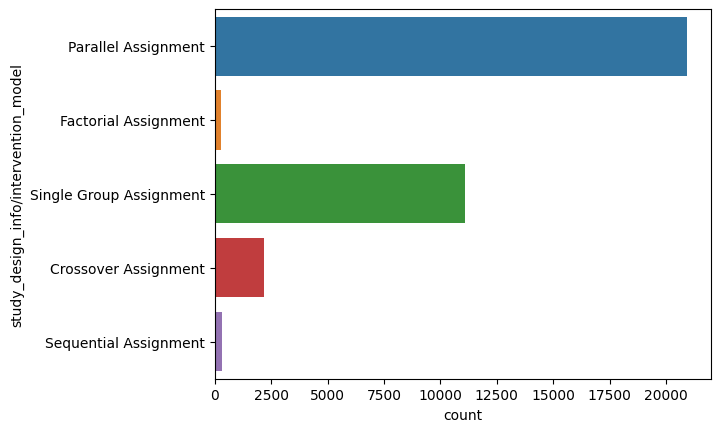

In [356]:
sns.countplot(data=All_data_sub, y='study_design_info/intervention_model')

In [358]:
NMI(All_data_sub[~All_data_sub['study_design_info/intervention_model'].isna()]['study_design_info/intervention_model'].astype('category').cat.codes, All_data_sub[~All_data_sub['study_design_info/intervention_model'].isna()]['Y'].astype('category').cat.codes )

0.005701158115934775

In [362]:
print('NAN数量:', All_data_sub['study_design_info/primary_purpose'].isna().sum())
All_data_sub['study_design_info/primary_purpose'].value_counts() # 

NAN数量: 2890


study_design_info/primary_purpose
Treatment                          29896
Prevention                          3078
Basic Science                        680
Other                                531
Supportive Care                      419
Diagnostic                           189
Health Services Research              80
Screening                             30
Device Feasibility                     3
Educational/Counseling/Training        2
Name: count, dtype: int64

In [363]:
NMI(All_data_sub[~All_data_sub['study_design_info/primary_purpose'].isna()]['study_design_info/primary_purpose'].astype('category').cat.codes, All_data_sub[~All_data_sub['study_design_info/primary_purpose'].isna()]['Y'].astype('category').cat.codes )

0.00486288636632958

study_design_info/masking
NAN数量: 2799
NMI:  0.007397402995969122


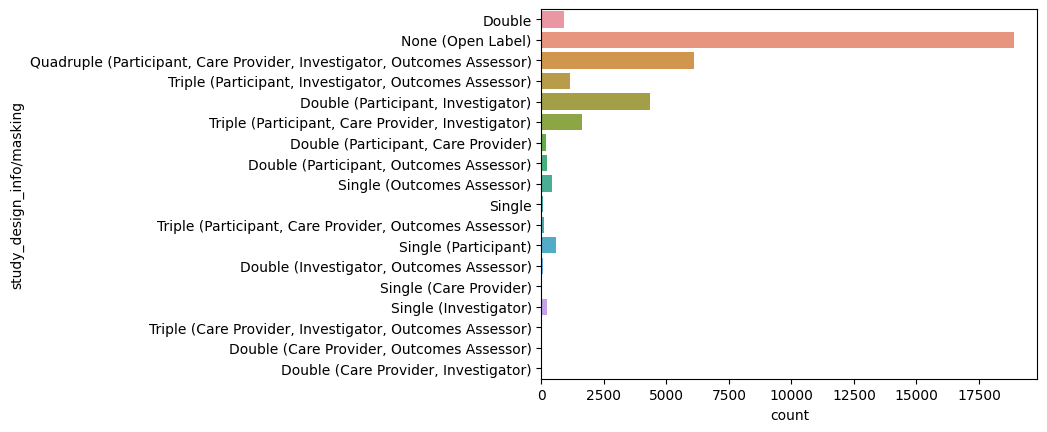

study_design_info/masking
None (Open Label)                                                          18894
Quadruple (Participant, Care Provider, Investigator, Outcomes Assessor)     6115
Double (Participant, Investigator)                                          4355
Triple (Participant, Care Provider, Investigator)                           1626
Triple (Participant, Investigator, Outcomes Assessor)                       1128
Double                                                                       915
Single (Participant)                                                         582
Single (Outcomes Assessor)                                                   443
Double (Participant, Outcomes Assessor)                                      230
Single (Investigator)                                                        221
Double (Participant, Care Provider)                                          176
Triple (Participant, Care Provider, Outcomes Assessor)                       118
Do

In [369]:
feature_name = 'study_design_info/masking'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
print('NMI: ',NMI(All_data_sub[~All_data_sub[feature_name].isna()][feature_name].astype('category').cat.codes, All_data_sub[~All_data_sub[feature_name].isna()]['Y'].astype('category').cat.codes ))
sns.countplot(data=All_data_sub, y=feature_name)
plt.show()
All_data_sub[feature_name].value_counts()

In [371]:
All_data_sub['study_design_info/masking_description']

37200

study_design_info/observational_model
NAN数量: 35596
NMI:  0.002360274382220211


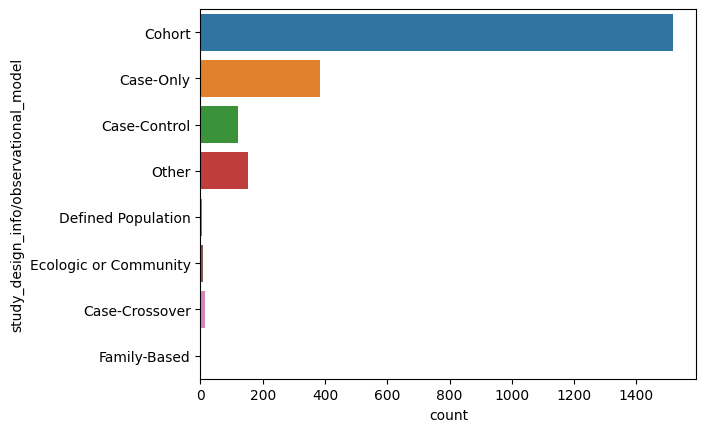

study_design_info/observational_model
Cohort                   1517
Case-Only                 384
Other                     153
Case-Control              120
Case-Crossover             14
Ecologic or Community       9
Defined Population          4
Family-Based                1
Name: count, dtype: int64

In [440]:
feature_name = 'study_design_info/observational_model'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
print('NMI: ',NMI(All_data_sub[~All_data_sub[feature_name].isna()][feature_name].astype('category').cat.codes, All_data_sub[~All_data_sub[feature_name].isna()]['Y'].astype('category').cat.codes ))
sns.countplot(data=All_data_sub, y=feature_name)
plt.show()
All_data_sub[feature_name].value_counts()

study_design_info/time_perspective
NAN数量: 35466
NMI:  0.00810511885905382


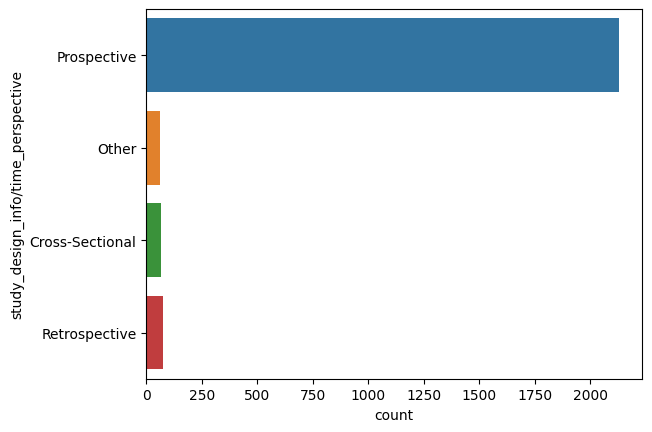

study_design_info/time_perspective
Prospective        2128
Retrospective        77
Cross-Sectional      67
Other                60
Name: count, dtype: int64

In [441]:
feature_name = 'study_design_info/time_perspective'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
print('NMI: ',NMI(All_data_sub[~All_data_sub[feature_name].isna()][feature_name].astype('category').cat.codes, All_data_sub[~All_data_sub[feature_name].isna()]['Y'].astype('category').cat.codes ))
sns.countplot(data=All_data_sub, y=feature_name)
plt.show()
All_data_sub[feature_name].value_counts()

condition  disease

In [577]:
# condition -> disease 转成ICD10
All_data_sub['condition'].value_counts()

condition
Breast Cancer                                                                                                       578
Asthma                                                                                                              563
Rheumatoid Arthritis                                                                                                552
Type 2 Diabetes Mellitus                                                                                            402
Influenza                                                                                                           343
                                                                                                                   ... 
['Restless Leg Syndrome', 'Iron Deficiency Anemia']                                                                   1
['Prostaglandin E1', 'Percutaneous Coronary Intervention']                                                            1
Locally Advanced Squamous Cell

In [299]:
All_data['condition'].isna().sum()

2

In [387]:
# 统计每个disease 出现多少次，包括多种疾病的
disease_num = {}
disease_y = {}
for index, diseases, y in All_data_sub[['condition', 'Y']].itertuples():
    if type(diseases) == list:
        diseases = eval(diseases)
        for disease in diseases:
            disease = disease.lower()
            if disease in disease_num.keys():
                disease_num[disease] += 1
                disease_y[disease].append(y)
            else:
                disease_num[disease] = 1
                disease_y[disease] = [y]
    elif type(diseases) == str and diseases[0] != '[':
        diseases = diseases.lower()
        if diseases in disease_num.keys():
            disease_num[diseases] += 1
            disease_y[diseases].append(y)
        else:
            disease_num[diseases] = 1
            disease_y[diseases] = [y]     
    elif type(diseases) == str and diseases[0] == '[':
        diseases = eval(diseases)
        for disease in diseases:
            disease = disease.lower()
            if disease in disease_num.keys():
                disease_num[disease] += 1
                disease_y[disease].append(y)
            else:
                disease_num[disease] = 1
                disease_y[disease] = [y]
     

58301

In [391]:
# 各个disease negative概率
disease_neg_percent = {}
for disease in disease_num.keys():
    disease_neg_percent[disease] = disease_y[disease].count(False)/disease_num[disease]
    # print(disease, disease_y[disease].count(False)/disease_num[disease])
sorted(disease_neg_percent, key=lambda x: x[1], reverse=True)

['sézary syndrome',
 'azathioprine',
 'azoospermia',
 'hypercholesterolemia',
 'hypertension',
 'lymphoma',
 'myelodysplastic syndromes',
 'lymphoma, hodgkin disease',
 'lymphoma: hodgkin',
 'systemic lupus erythematosus',
 'myeloproliferative disorders',
 'lymphoma, b-cell',
 'hypereosinophilic syndrome',
 'myocardial infarction',
 'myelodysplastic/myeloproliferative neoplasms',
 'lymphoma, t-cell',
 'myelodysplastic/myeloproliferative diseases',
 'mycosis fungoides',
 'lymphoma, low-grade',
 'lymphoma, follicular',
 'lymphoma, mixed-cell, follicular',
 'lymphoma, small cleaved-cell, follicular',
 'hypogonadism',
 'lymphoma, non-hodgkin',
 'myelodysplastic syndrome',
 'myelodysplastic-myeloproliferative diseases',
 'lymphoma, malignant',
 'cystic fibrosis',
 'hypertension, renovascular',
 'lymphoma, large-cell, ki-1',
 'lymphoproliferative disorder',
 'myocardial ischemia',
 'cytomegalovirus infections',
 'myelodysplastic syndrome with excess blasts',
 'hyperlipidemia',
 'hypertriglyc

In [578]:
sorted(disease_neg_percent.items(), key=lambda x: x[1], reverse=True)[:20]

[('pneumonia, pneumocystis carinii', 1.0),
 ('pheochromocytoma', 1.0),
 ('bronchial alveolar; tumor', 1.0),
 ('primitive neuroectodermal tumor', 1.0),
 ('stage iv kidney cancer', 1.0),
 ('stomach (gastric) cancer', 1.0),
 ('unknown primary carcinoma', 1.0),
 ('mediastinal cancer', 1.0),
 ('familial adenomatous polyposis', 1.0),
 ('skin ulcer', 1.0),
 ('acute graft versus host disease', 1.0),
 ('epilepsy, temporal lobe', 1.0),
 ('cardiac transplant', 1.0),
 ('lymphoma, mixed-cell, follicular', 1.0),
 ('lymphoma, small cleaved-cell, follicular', 1.0),
 ('foot ulcers', 1.0),
 ('rest leg pain', 1.0),
 ('kallmann syndrome', 1.0),
 ('insular thyroid cancer', 1.0),
 ('metastatic parathyroid cancer', 1.0)]

/Users/fengyuan/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:93: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  func(*args, **kwargs)
/Users/fengyuan/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:93: UserWarning: Glyph 65307 (\N{FULLWIDTH SEMICOLON}) missing from current font.
  func(*args, **kwargs)
/Users/fengyuan/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/fengyuan/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65307 (\N{FULLWIDTH SEMICOLON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


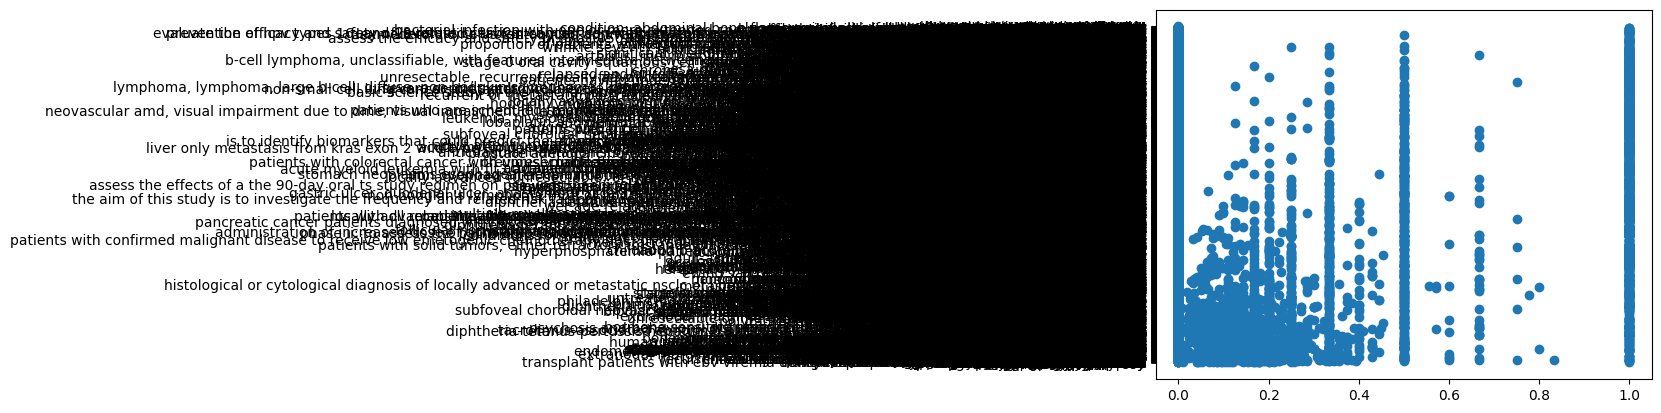

In [398]:
plt.scatter(disease_neg_percent.values(), disease_neg_percent.keys())

#### intervention -> drug

intervention_name

intervention_type

intervention_name 和type是不是有对应关系？



In [406]:
# 统计每个drug 出现多少次，包括多种疾病的
drug_num = {}
drug_y = {}
for index, drugs, y in All_data_sub[['intervention/intervention_type', 'Y']].itertuples():
    if type(drugs) == list:
        drugs = eval(drugs)
        for drug in drugs:
            drug = drug.lower()
            if drug in drug_num.keys():
                drug_num[drug] += 1
                drug_y[drug].append(y)
            else:
                drug_num[drug] = 1
                drug_y[drug] = [y]
    elif type(drugs) == str and drugs[0] != '[':
        drugs = drugs.lower()
        if drugs in drug_num.keys():
            drug_num[drugs] += 1
            drug_y[drugs].append(y)
        else:
            drug_num[drugs] = 1
            drug_y[drugs] = [y]     
    elif type(drugs) == str and (drugs[0] == '[' and drugs[-1] == ']'):
        drugs = eval(drugs)
        for drug in drugs:
            drug = drug.lower()
            if drug in drug_num.keys():
                drug_num[drug] += 1
                drug_y[drug].append(y)
            else:
                drug_num[drug] = 1
                drug_y[drug] = [y]

sum(drug_num.values())

84891

{'drug': 66215,
 'biological': 8755,
 'procedure': 2020,
 'radiation': 851,
 'other': 4017,
 'genetic': 372,
 'dietary supplement': 1026,
 'behavioral': 399,
 'device': 1113,
 'combination product': 100,
 'diagnostic test': 23}

In [409]:
drug_neg_percent = {}
for drug in drug_num.keys():
    drug_neg_percent[drug] = drug_y[drug].count(False)/drug_num[drug]

sorted(drug_neg_percent.items(), key=lambda x: x[1], reverse=True)

[('radiation', 0.2890716803760282),
 ('procedure', 0.26435643564356437),
 ('genetic', 0.17204301075268819),
 ('behavioral', 0.13032581453634084),
 ('combination product', 0.13),
 ('other', 0.12347523027134677),
 ('dietary supplement', 0.11988304093567251),
 ('device', 0.11410601976639713),
 ('drug', 0.1029827078456543),
 ('biological', 0.0624785836664763),
 ('diagnostic test', 0.043478260869565216)]

In [404]:
# 统计每个drug_name 出现多少次，包括多种疾病的
drug_num = {}
drug_y = {}
for index, drugs, y in All_data_sub[['intervention/intervention_name', 'Y']].itertuples():
    if type(drugs) == list:
        drugs = eval(drugs)
        for drug in drugs:
            drug = drug.lower()
            if drug in drug_num.keys():
                drug_num[drug] += 1
                drug_y[drug].append(y)
            else:
                drug_num[drug] = 1
                drug_y[drug] = [y]
    elif type(drugs) == str and drugs[0] != '[':
        drugs = drugs.lower()
        if drugs in drug_num.keys():
            drug_num[drugs] += 1
            drug_y[drugs].append(y)
        else:
            drug_num[drugs] = 1
            drug_y[drugs] = [y]     
    elif type(drugs) == str and (drugs[0] == '[' and drugs[-1] == ']'):
        drugs = eval(drugs)
        for drug in drugs:
            drug = drug.lower()
            if drug in drug_num.keys():
                drug_num[drug] += 1
                drug_y[drug].append(y)
            else:
                drug_num[drug] = 1
                drug_y[drug] = [y]

sum(drug_num.values())

84883

In [433]:
# ?
feature_name = 'intervention_browse/mesh_term'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
print('NMI: ',NMI(All_data_sub[~All_data_sub[feature_name].isna()][feature_name].astype('category').cat.codes, All_data_sub[~All_data_sub[feature_name].isna()]['Y'].astype('category').cat.codes ))
# sns.countplot(data=All_data_sub, y=feature_name)
# plt.show()
All_data_sub[feature_name].value_counts()

intervention_browse/mesh_term
NAN数量: 10983


NMI:  0.03981210304303809


intervention_browse/mesh_term
Vaccines                                                                  531
['Botulinum Toxins', 'Botulinum Toxins, Type A', 'abobotulinumtoxinA']    165
Rituximab                                                                 163
Ranibizumab                                                               141
Epoetin Alfa                                                              129
                                                                         ... 
['Paclitaxel', 'Carboplatin', 'Panitumumab']                                1
['Bortezomib', 'Busulfan']                                                  1
['Ritonavir', 'Fostemsavir']                                                1
['Doxorubicin', 'Everolimus']                                               1
['Propofol', 'Desflurane']                                                  1
Name: count, Length: 8509, dtype: int64

In [480]:
feature_name = 'intervention/arm_group_label'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
# print('NMI: ',NMI(All_data_sub[~All_data_sub[feature_name].isna()][feature_name].astype('category').cat.codes, All_data_sub[~All_data_sub[feature_name].isna()]['Y'].astype('category').cat.codes ))
# sns.countplot(data=All_data_sub, y=feature_name)
# plt.show()
All_data_sub[feature_name].value_counts()

intervention/arm_group_label
NAN数量: 3587
NMI:  0.054753168767663674


intervention/arm_group_label
['1', '2']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 747
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [481]:
feature_name = 'intervention/other_name'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
# print('NMI: ',NMI(All_data_sub[~All_data_sub[feature_name].isna()][feature_name].astype('category').cat.codes, All_data_sub[~All_data_sub[feature_name].isna()]['Y'].astype('category').cat.codes ))
# sns.countplot(data=All_data_sub, y=feature_name)
# plt.show()
All_data_sub[feature_name].value_counts()

intervention/other_name
NAN数量: 19160


intervention/other_name
Avastin                                                                                                                                                                                          57
Tarceva                                                                                                                                                                                          37
Lucentis                                                                                                                                                                                         36
Abilify                                                                                                                                                                                          33
['ABT-D2E7', 'Humira']                                                                                                                                                                          

eligibility

criteria/textblock 文本

gender

healthy_volunteers

study_pop/textblock

sampling_method

In [485]:
All_data_sub['eligibility/sampling_method'].value_counts()

eligibility/sampling_method
Non-Probability Sample    1641
Probability Sample         712
Name: count, dtype: int64

In [484]:
All_data_sub['eligibility/study_pop/textblock'].value_counts()

eligibility/study_pop/textblock
\n        Primary care clinic\r\n                                                                                                                                                                                                                                                                                                                                                                                                 14
\n        Paediatric subjects (aged 2-18) who are taking SAIZEN® for registered indications using the\r\n        easypod™ electromechanical device.\r\n                                                                                                                                                                                                                                                                           10
\n        Community sample\r\n                                                                                                

In [420]:
# 需要文本处理
All_data_sub['eligibility/criteria/textblock']

NCT00000102    \n        Inclusion Criteria:\r\n\r\n         ...
NCT00000172    \n        Inclusion Criteria:\r\n\r\n         ...
NCT00000173    \n        Inclusion Criteria:\r\n\r\n         ...
NCT00000174    \n        Inclusion Criteria:\r\n\r\n         ...
NCT00000390    \n        Inclusion Criteria:\r\n\r\n         ...
                                     ...                        
NCT03731793    \n        Inclusion Criteria:\r\n\r\n         ...
NCT03733301    \n        Inclusion Criteria:\r\n\r\n         ...
NCT03733574    \n        Inclusion Criteria:\r\n\r\n         ...
NCT03736044    \n        Inclusion Criteria:\r\n\r\n         ...
NCT03736473    \n        Major Inclusion Criteria:\r\n\r\n   ...
Name: eligibility/criteria/textblock, Length: 37798, dtype: object

In [579]:
All_data_sub['eligibility/criteria/textblock']['NCT00000390']

'\n        Inclusion Criteria:\r\n\r\n          -  Patient must be ambulatory and relatively good health. Even if unable to work at least\r\n             able to partially care care for self and not demented.\r\n\r\n          -  May have been alcoholic or drug abuser 6 months previous.\r\n\r\n          -  Unspecified\r\n\r\n          -  CD4 Unspecified.\r\n\r\n        Exclusion Criteria:\r\n\r\n          -  Non ambulatory patients or those requiring extensive help in self care are excluded.\r\n\r\n          -  Non ambulatory patients or those requiring extensive help in self care are excluded.\r\n\r\n          -  Current alcohol or drug abuse.\r\n\r\n          -  Unspecified\r\n      '

In [580]:
# text = All_data_sub['eligibility/criteria/textblock']['NCT00000390']
# items = [t.strip() for t in text.split('Exclusion Criteria:')[0].split('\n') if len(t)>3]
# print(items[1:])
# items = [t.strip() for t in text.split('Exclusion Criteria:')[1].split('\n') if len(t)>3]
# # text.split('Exclusion Criteria:')
# print(items)

['-  Patient must be ambulatory and relatively good health. Even if unable to work at least', 'able to partially care care for self and not demented.', '-  May have been alcoholic or drug abuser 6 months previous.', '-  Unspecified', '-  CD4 Unspecified.', '']
['-  Non ambulatory patients or those requiring extensive help in self care are excluded.', '-  Non ambulatory patients or those requiring extensive help in self care are excluded.', '-  Current alcohol or drug abuse.', '-  Unspecified', '']


eligibility/gender
NAN数量: 0
NMI:  0.001316530392166238


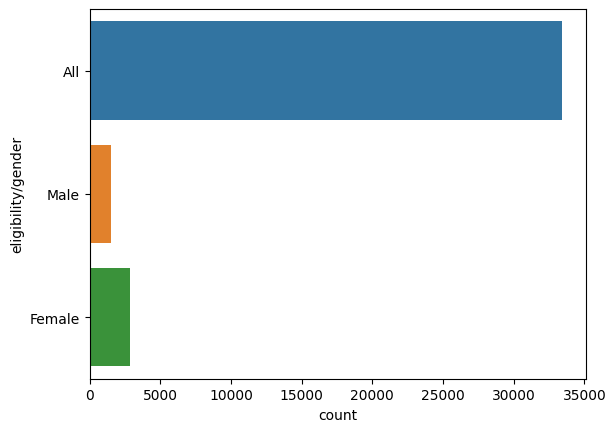

eligibility/gender
All       33411
Female     2895
Male       1492
Name: count, dtype: int64

In [418]:
feature_name = 'eligibility/gender'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
print('NMI: ', NMI(All_data_sub[~All_data_sub[feature_name].isna()][feature_name].astype('category').cat.codes, All_data_sub[~All_data_sub[feature_name].isna()]['Y'].astype('category').cat.codes ))
sns.countplot(data=All_data_sub, y=feature_name)
plt.show()
All_data_sub[feature_name].value_counts()

In [419]:
All_data['eligibility/minimum_age'].value_counts()

eligibility/minimum_age
18 Years     35920
20 Years      2282
40 Years      1321
50 Years       867
12 Years       749
             ...  
71 Days          1
22 Months        1
10 Weeks         1
43 Years         1
46 Months        1
Name: count, Length: 171, dtype: int64

eligibility/maximum_age
NAN数量: 19880


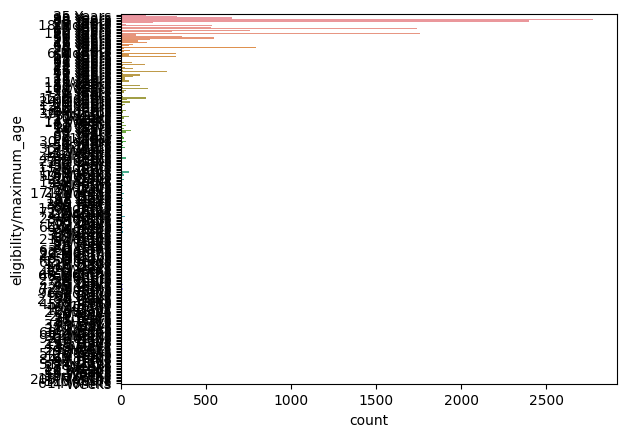

eligibility/maximum_age
65 Years     2777
75 Years     2401
70 Years     1758
80 Years     1741
55 Years      792
             ... 
46 Months       1
16 Days         1
118 Days        1
54 Days         1
4 Weeks         1
Name: count, Length: 240, dtype: int64

In [416]:
feature_name = 'eligibility/maximum_age'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
# print('NMI: ',NMI(All_data_sub[~All_data_sub[feature_name].isna()][feature_name].astype('category').cat.codes, All_data_sub[~All_data_sub[feature_name].isna()]['Y'].astype('category').cat.codes ))
sns.countplot(data=All_data_sub, y=feature_name)
plt.show()
All_data_sub[feature_name].value_counts()

eligibility/healthy_volunteers
NAN数量: 229
NMI:  0.011374998300416538


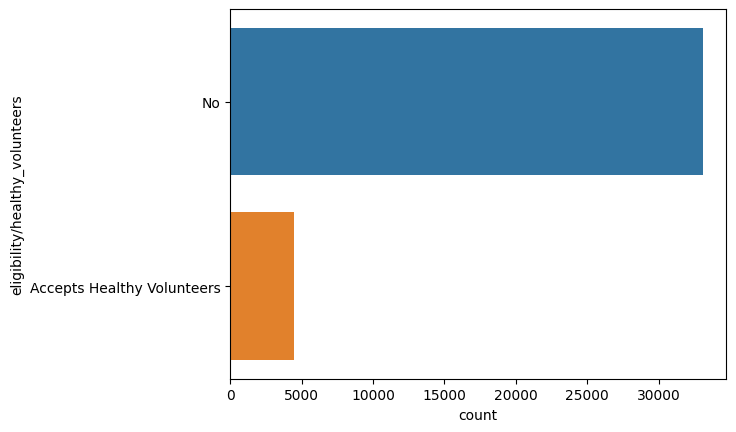

eligibility/healthy_volunteers
No                            33083
Accepts Healthy Volunteers     4486
Name: count, dtype: int64

In [414]:
feature_name = 'eligibility/healthy_volunteers'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
print('NMI: ',NMI(All_data_sub[~All_data_sub[feature_name].isna()][feature_name].astype('category').cat.codes, All_data_sub[~All_data_sub[feature_name].isna()]['Y'].astype('category').cat.codes ))
sns.countplot(data=All_data_sub, y=feature_name)
plt.show()
All_data_sub[feature_name].value_counts()

location

location/contact/last_name	location/contact/phone	location/contact/email	location/investigator/last_name	location/investigator/role

In [527]:
feature_name = 'location/status'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
All_data_sub[feature_name].value_counts()

location/status
NAN数量: 36759


location/status
Recruiting                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [526]:
location_status_num = {}
location_status_y = {}
for index, location_statuss, y in All_data_sub[['location/status', 'Y']].itertuples():
    if type(location_statuss) == list:
        location_statuss = eval(location_statuss)
        for location_status in location_statuss:
            location_status = location_status.lower()
            if location_status in location_status_num.keys():
                location_status_num[location_status] += 1
                location_status_y[location_status].append(y)
            else:
                location_status_num[location_status] = 1
                location_status_y[location_status] = [y]
    elif type(location_statuss) == str and location_statuss[0] != '[':
        location_statuss = location_statuss.lower()
        if location_statuss in location_status_num.keys():
            location_status_num[location_statuss] += 1
            location_status_y[location_statuss].append(y)
        else:
            location_status_num[location_statuss] = 1
            location_status_y[location_statuss] = [y]     
    elif type(location_statuss) == str and location_statuss[0] == '[':
        location_statuss = eval(location_statuss)
        for location_status in location_statuss:
            location_status = location_status.lower()
            if location_status in location_status_num.keys():
                location_status_num[location_status] += 1
                location_status_y[location_status].append(y)
            else:
                location_status_num[location_status] = 1
                location_status_y[location_status] = [y]
     
location_status_percent = {}
for k in location_status_num.keys():
    location_status_percent[k] = location_status_y[k].count(False) / location_status_num[k]
sorted(location_status_percent.items(), key=lambda x: x[1], reverse=True)

[('not yet recruiting', 0.02912621359223301),
 ('recruiting', 0.027160493827160494),
 ('active, not recruiting', 0.010526315789473684),
 ('completed', 0.0),
 ('withdrawn', 0.0),
 ('suspended', 0.0),
 ('terminated', 0.0)]

In [509]:

feature_name = 'removed_countries/country'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
# print('NMI: ', NMI(All_data_sub[~All_data_sub[feature_name].isna()][feature_name].astype('category').cat.codes, All_data_sub[~All_data_sub[feature_name].isna()]['Y'].astype('category').cat.codes))
# sns.countplot(data=All_data_sub, y=feature_name)
# plt.show()
All_data_sub[feature_name].value_counts()

removed_countries/country
NAN数量: 33105


removed_countries/country
Czech Republic                                                      641
United States                                                       622
Canada                                                              110
Japan                                                               109
Germany                                                              90
                                                                   ... 
['Austria', 'Luxembourg', 'United Kingdom']                           1
['Austria', 'Belgium', 'France', 'Netherlands', 'United States']      1
['Switzerland', 'Turkey']                                             1
['France', 'New Zealand']                                             1
Estonia                                                               1
Name: count, Length: 1599, dtype: int64

In [491]:
feature_name = 'location/facility/address/zip'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
# print('NMI: ', NMI(All_data_sub[~All_data_sub[feature_name].isna()][feature_name].astype('category').cat.codes, All_data_sub[~All_data_sub[feature_name].isna()]['Y'].astype('category').cat.codes))
# sns.countplot(data=All_data_sub, y=feature_name)
# plt.show()
All_data_sub[feature_name].value_counts()

location/facility/address/zip
NAN数量: 9909


location/facility/address/zip
77030                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [422]:
feature_name = 'location/facility/name'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
# print('NMI: ', NMI(All_data_sub[~All_data_sub[feature_name].isna()][feature_name].astype('category').cat.codes, All_data_sub[~All_data_sub[feature_name].isna()]['Y'].astype('category').cat.codes))
# sns.countplot(data=All_data_sub, y=feature_name)
# plt.show()
All_data_sub[feature_name].value_counts()

location/facility/name
NAN数量: 6651
NMI:  0.054357300450893174


location/facility/name
GSK Investigational Site                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [424]:
feature_name = 'location/facility/address/city'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
# print('NMI: ', NMI(All_data_sub[~All_data_sub[feature_name].isna()][feature_name].astype('category').cat.codes, All_data_sub[~All_data_sub[feature_name].isna()]['Y'].astype('category').cat.codes))
# sns.countplot(data=All_data_sub, y=feature_name)
# plt.show()
All_data_sub[feature_name].value_counts()

location/facility/address/city
NAN数量: 2992


location/facility/address/city
Seoul                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [425]:
feature_name = 'location/facility/address/state'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
# print('NMI: ', NMI(All_data_sub[~All_data_sub[feature_name].isna()][feature_name].astype('category').cat.codes, All_data_sub[~All_data_sub[feature_name].isna()]['Y'].astype('category').cat.codes))
# sns.countplot(data=All_data_sub, y=feature_name)
# plt.show()
All_data_sub[feature_name].value_counts()

location/facility/address/state
NAN数量: 13250


location/facility/address/state
California                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [426]:
feature_name = 'location/facility/address/country'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
# print('NMI: ', NMI(All_data_sub[~All_data_sub[feature_name].isna()][feature_name].astype('category').cat.codes, All_data_sub[~All_data_sub[feature_name].isna()]['Y'].astype('category').cat.codes))
# sns.countplot(data=All_data_sub, y=feature_name)
# plt.show()
All_data_sub[feature_name].value_counts()

location/facility/address/country
NAN数量: 2992


location/facility/address/country
United States                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [427]:
feature_name = 'location_countries/country'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
# print('NMI: ', NMI(All_data_sub[~All_data_sub[feature_name].isna()][feature_name].astype('category').cat.codes, All_data_sub[~All_data_sub[feature_name].isna()]['Y'].astype('category').cat.codes))
# sns.countplot(data=All_data_sub, y=feature_name)
# plt.show()
All_data_sub[feature_name].value_counts()

location_countries/country
NAN数量: 2992


location_countries/country
United States                                                                                                                12435
Japan                                                                                                                         1432
China                                                                                                                         1339
Germany                                                                                                                       1156
Korea, Republic of                                                                                                            1127
                                                                                                                             ...  
['Israel', 'Italy', 'Spain', 'United States']                                                                                    1
['Australia', 'Brazil', 'Colombia', 'Costa Rica', 'Mexic

DATE: study_first_submitted	study_first_submitted_qc	study_first_posted	last_update_submitted	last_update_submitted_qc	last_update_posted start_date completion_date	primary_completion_date results_first_submitted	results_first_submitted_qc	results_first_posted disposition_first_submitted	 disposition_first_submitted_qc	disposition_first_posted  pending_results/submitted	pending_results/returned 都是日期 时间间隔招募时长 terminated 是否有日期 -

In [608]:
feature_names = ['study_first_submitted', 'study_first_submitted_qc', 'study_first_posted' , 'last_update_submitted', 
                'last_update_submitted_qc','last_update_posted', 'start_date', 'completion_date', 'primary_completion_date', 
                'results_first_submitted',	'results_first_submitted_qc', 'results_first_posted', 'disposition_first_submitted',
                'disposition_first_submitted_qc', 'disposition_first_posted', 'pending_results/submitted', 'pending_results/returned'] 

study_first_submitted Nan : 0
0
study_first_submitted_qc Nan : 0
0
study_first_posted Nan : 0
0
last_update_submitted Nan : 0
0
last_update_submitted_qc Nan : 0
0
last_update_posted Nan : 0
0
start_date Nan : 754
15


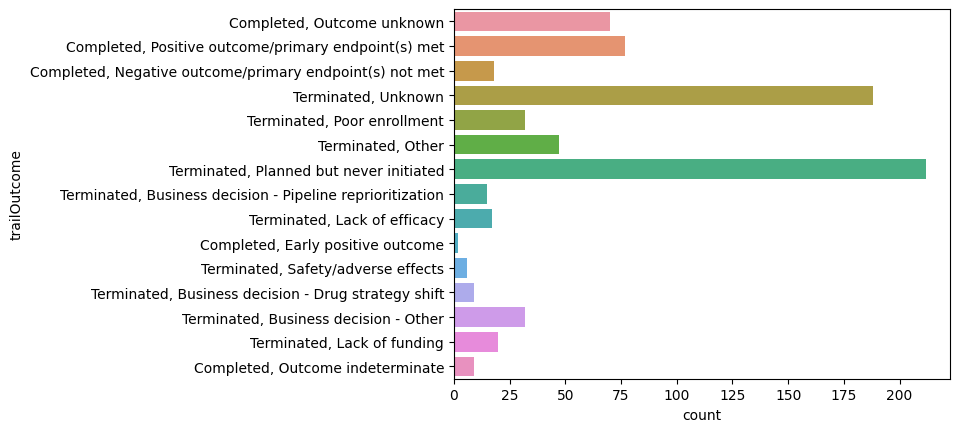

completion_date Nan : 3185
15


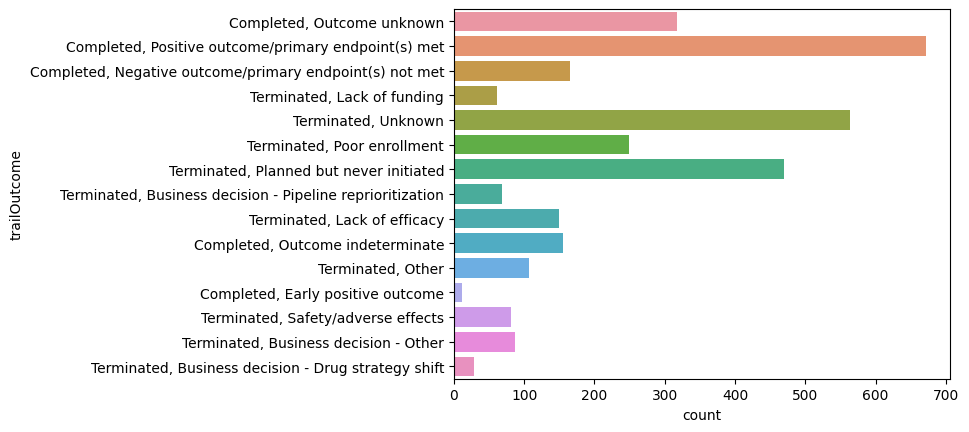

primary_completion_date Nan : 2635
15


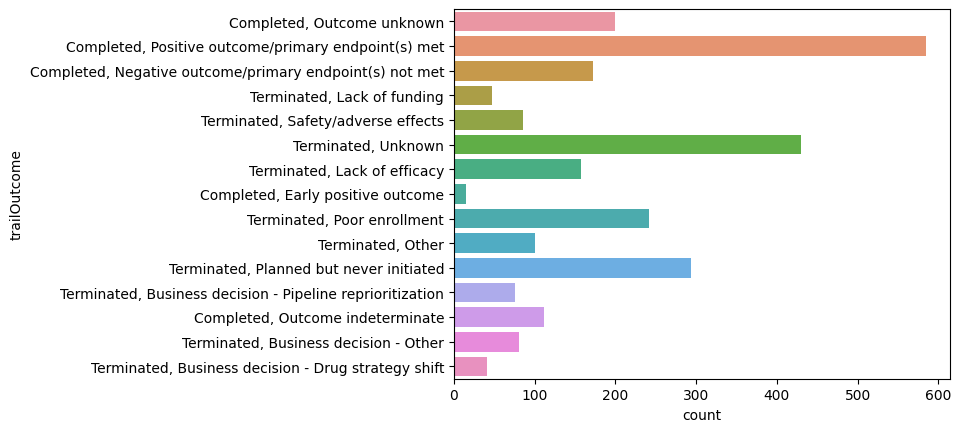

results_first_submitted Nan : 30608
15


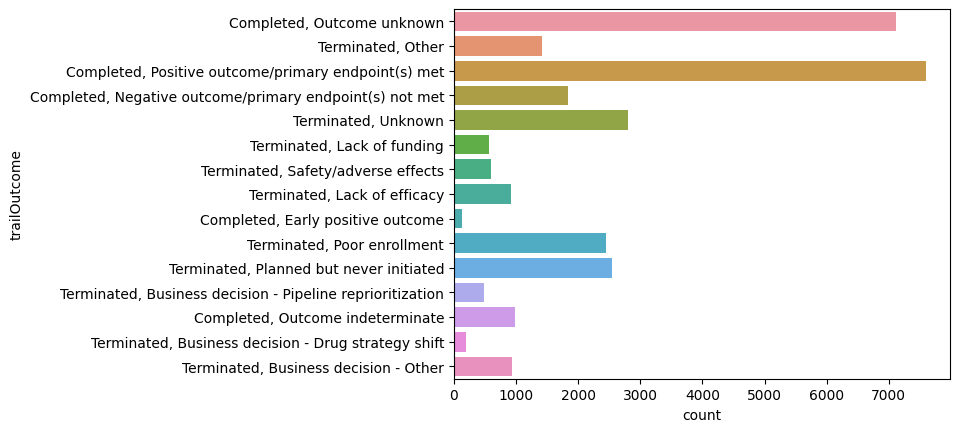

results_first_submitted_qc Nan : 30608
15


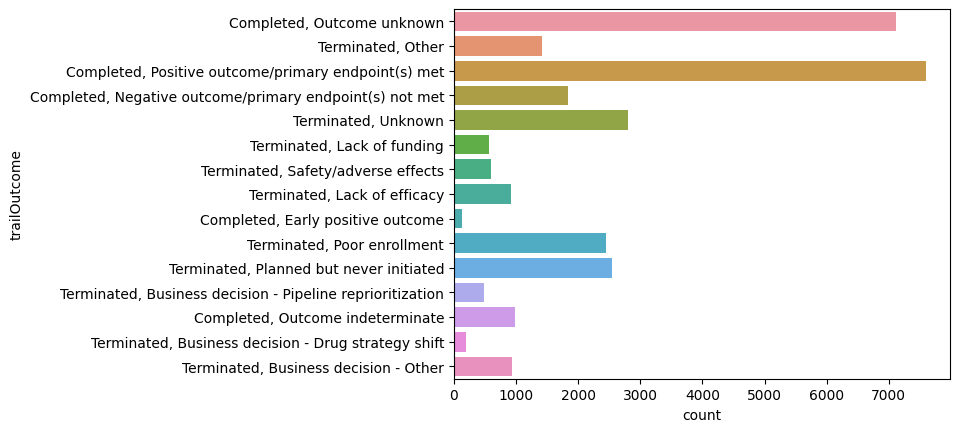

results_first_posted Nan : 30608
15


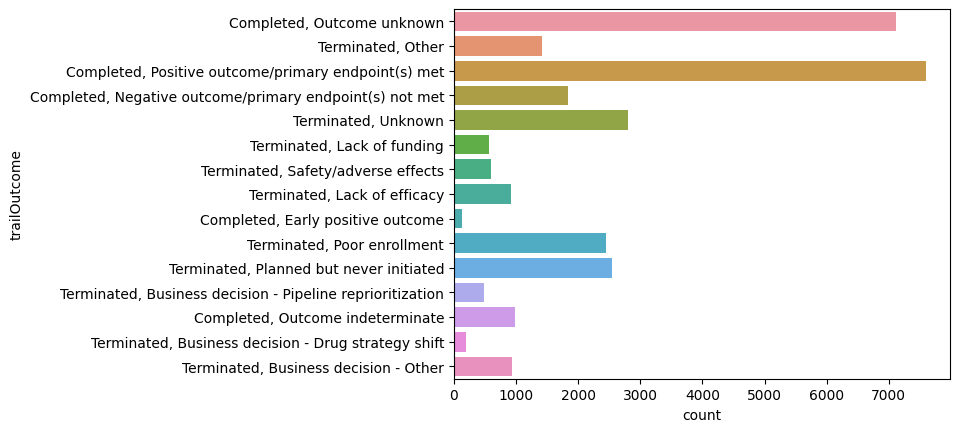

disposition_first_submitted Nan : 46419
15


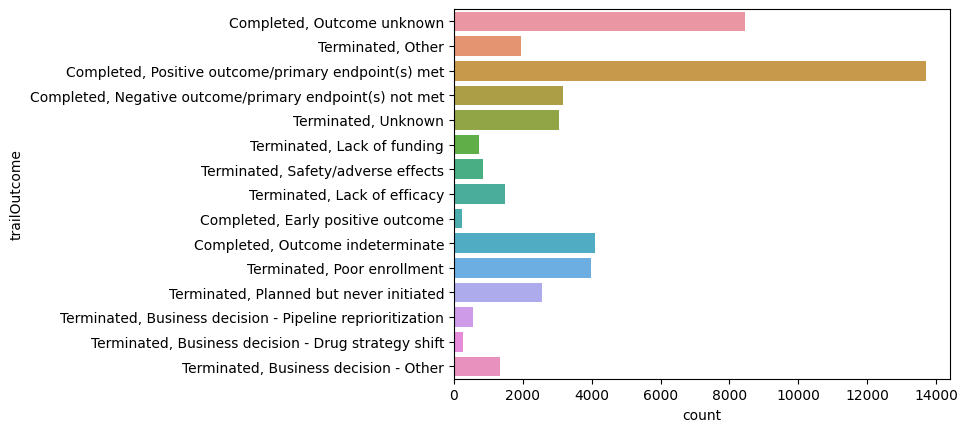

disposition_first_submitted_qc Nan : 46419
15


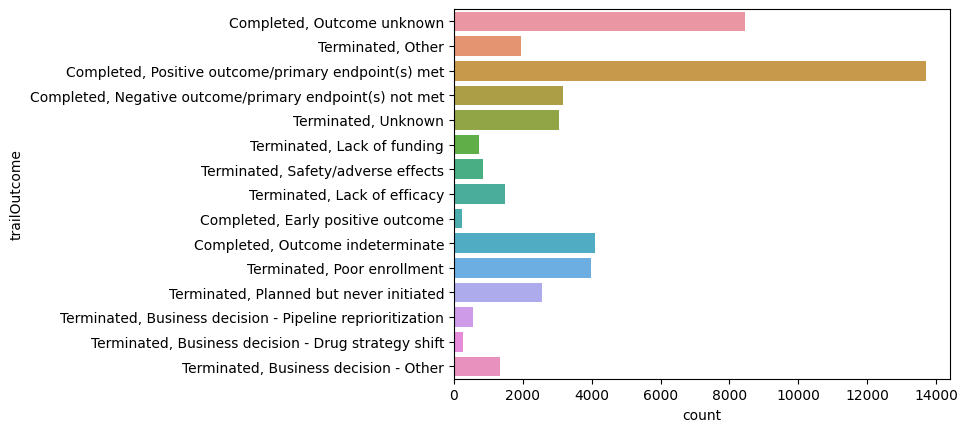

disposition_first_posted Nan : 46419
15


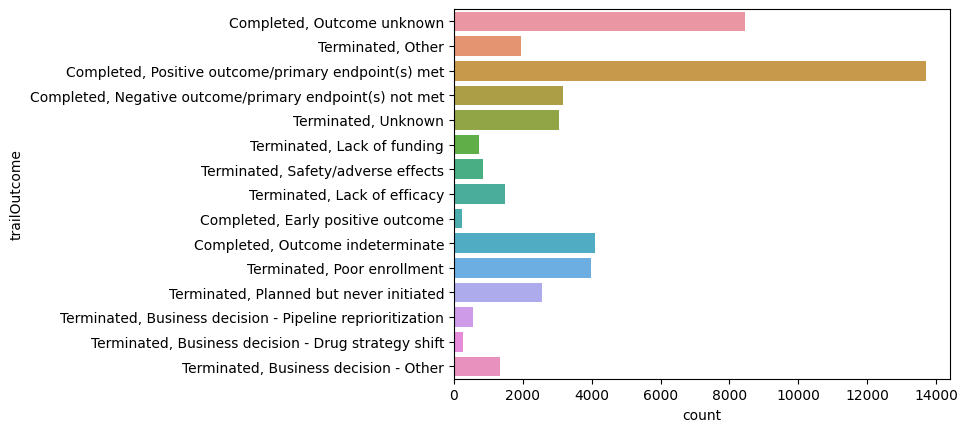

pending_results/submitted Nan : 50270
15


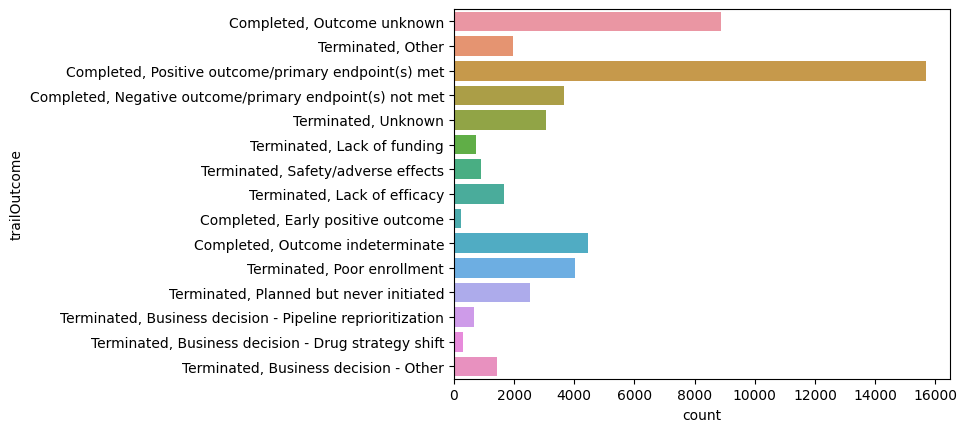

pending_results/returned Nan : 50341
15


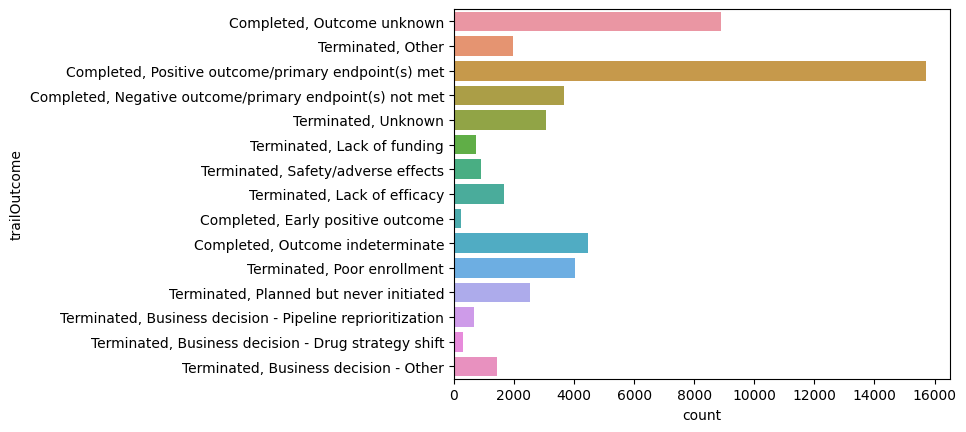

In [612]:
for feature_name in feature_names:
    print(feature_name, 'Nan :', All_data[feature_name].isna().sum())
    print(len(All_data['trailOutcome'][All_data[feature_name].isna()].value_counts()))
    if All_data[feature_name].isna().sum() > 0 :
        sns.countplot(data=All_data[All_data[feature_name].isna()], y='trailOutcome')
        plt.show()

oversight_info/has_dmc

primary_outcome target

In [635]:
def normalize_measure(value):
    if type(value) != str:
        return value
    if '[' in value:
        return value
    value = value.lower().replace('-', '\t').split('(')[0].strip()
    return value

In [636]:
df = All_data_sub
df['primary_outcome/measure'] = df['primary_outcome/measure'].apply(normalize_measure)
df['primary_outcome/measure'].value_counts()

/var/folders/gj/fgl492zn5lngy1_gzbnc70880000gp/T/ipykernel_28051/3857224179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['primary_outcome/measure'] = df['primary_outcome/measure'].apply(normalize_measure)


primary_outcome/measure
progressionfree survival                                                                                                                                 412
overall survival                                                                                                                                         354
progression free survival                                                                                                                                333
overall response rate                                                                                                                                    261
objective response rate                                                                                                                                  213
                                                                                                                                                        ... 
mean abdominal distension after a 

In [638]:
df['trailOutcome'][df['primary_outcome/measure']=='overall survival'].value_counts()

trailOutcome
Completed, Negative outcome/primary endpoint(s) not met    127
Completed, Positive outcome/primary endpoint(s) met        106
Terminated, Poor enrollment                                 60
Completed, Outcome unknown                                  28
Completed, Outcome indeterminate                            20
Completed, Early positive outcome                           13
Name: count, dtype: int64

In [617]:
All_data_sub['primary_outcome/measure'].value_counts()

primary_outcome/measure
Overall Survival                                                                                                                                                                                                                                                                                                                                                                                                            122
Progression Free Survival (PFS)                                                                                                                                                                                                                                                                                                                                                                                             100
Overall survival                                                                                                                                

In [454]:
All_data_sub['primary_outcome/time_frame'].value_counts()

primary_outcome/time_frame
6 months                                                                                566
12 weeks                                                                                482
12 months                                                                               376
1 year                                                                                  350
2 years                                                                                 346
                                                                                       ... 
At each visit except visits 2 and 11.                                                     1
['Screening (day -21 to -1) and month 12', 'Screening (day -21 to -1) and month 12']      1
6 Months and 12 months treatment                                                          1
['1 year', '1 year post last treatment']                                                  1
From the informed consent to 90 days after the last d

In [457]:
All_data_sub['secondary_outcome/measure'].isna().sum()

5340

In [458]:
All_data_sub['secondary_outcome/time_frame'].value_counts()

secondary_outcome/time_frame
6 months                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      167
1 year                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [510]:
feature_name = 'other_outcome/measure'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
All_data_sub[feature_name].value_counts()

other_outcome/measure
NAN数量: 35254


other_outcome/measure
Adverse events                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              7
Percentage of Participants With Hypoglycemic Events                                                                                                                                                                 

In [511]:
feature_name = 'other_outcome/time_frame'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
All_data_sub[feature_name].value_counts()

other_outcome/time_frame
NAN数量: 35258


other_outcome/time_frame
12 months                                                                                                         20
1 year                                                                                                            20
6 months                                                                                                          18
12 weeks                                                                                                          17
Baseline                                                                                                          15
                                                                                                                  ..
['Week 12', 'Week 12', 'Week 12', 'Week 12', 'Week 12', 'Week 12', 'Week 12', 'Week 12', 'Week 12', 'Week 12']     1
At week 24 and At week 52                                                                                          1
From the first dose of study treatment 

number_of_groups

number_of_groups
NAN数量: 35867
NMI:  0.007982829827552045


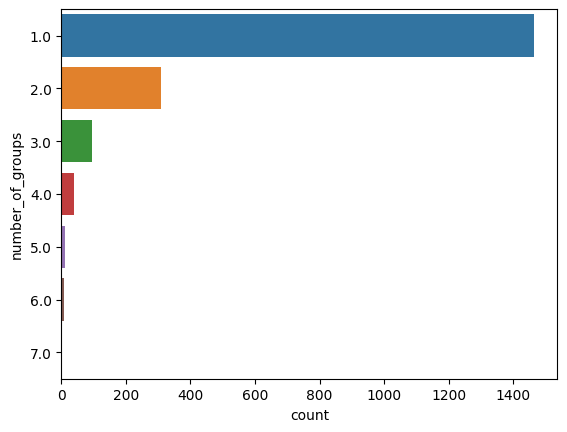

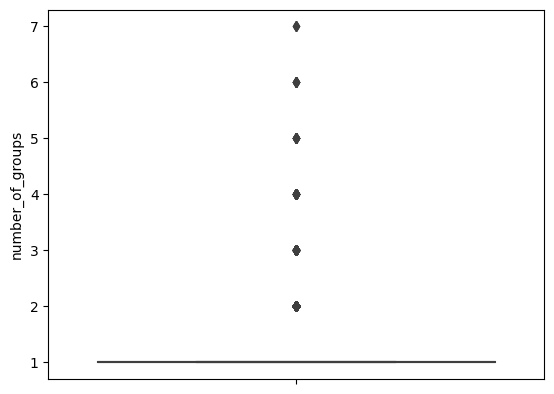

number_of_groups
1.0    1464
2.0     310
3.0      95
4.0      39
5.0      12
6.0       8
7.0       3
Name: count, dtype: int64

In [536]:
All_data_sub['number_of_groups'].value_counts()
feature_name = 'number_of_groups' # 数值，没有转类别
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
print('NMI: ', NMI(All_data_sub[~All_data_sub[feature_name].isna()][feature_name], All_data_sub[~All_data_sub[feature_name].isna()]['Y'].astype('category').cat.codes))
sns.countplot(data=All_data_sub, y=feature_name)
plt.show()
sns.boxplot(data=All_data_sub, y=feature_name)
plt.show()
All_data_sub[feature_name].value_counts()

enrollment *

enrollment
NAN数量: 271
NMI:  0.03750106618756106


enrollment
30.0      696
20.0      664
60.0      621
40.0      587
0.0       532
         ... 
1569.0      1
2149.0      1
1631.0      1
6901.0      1
966.0       1
Name: count, Length: 2414, dtype: int64

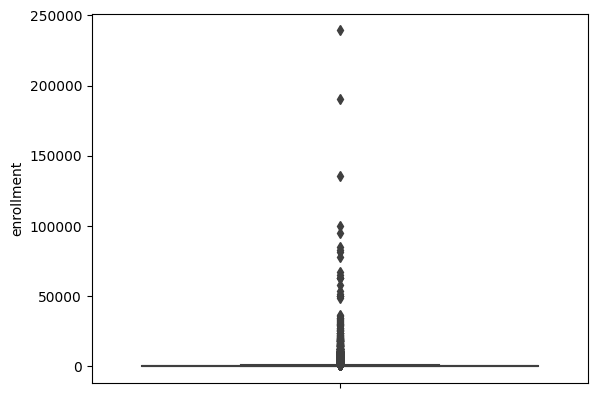

In [467]:
feature_name = 'enrollment'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
print('NMI: ', NMI(All_data_sub[~All_data_sub[feature_name].isna()][feature_name], All_data_sub[~All_data_sub[feature_name].isna()]['Y'].astype('category').cat.codes))
sns.boxplot(data=All_data_sub, y=feature_name)
# plt.show()
All_data_sub[feature_name].value_counts()

arm_group 

In [478]:
All_data_sub['arm_group/description'].value_counts()

arm_group/description
Antineoplaston therapy (Atengenal + Astugenal) by IV infusion every four hours for at least 12 months. Study subjects receive increasing dosages of Atengenal and Astugenal until the maximum tolerated dose is reached.                                    29
See Detailed Description                                                                                                                                                                                                                                    20
Placebo                                                                                                                                                                                                                                                     11
Single arm                                                                                                                                                                                                           

In [471]:
All_data_sub['arm_group/arm_group_label'].value_counts()

arm_group/arm_group_label
['1', '2']                                                                                                                   1016
1                                                                                                                             576
['A', 'B']                                                                                                                    278
['1', '2', '3']                                                                                                               273
['1', '2', '3', '4']                                                                                                          144
                                                                                                                             ... 
Treat Regimen                                                                                                                   1
['Clobetasol Propionate 0.05%', 'Vehicle']                      

In [475]:
# 统计每个disease 出现多少次，包括多种疾病的
armgrouptype_num = {}
armgrouptype_y = {}
for index, armgrouptypes, y in All_data_sub[['arm_group/arm_group_type', 'Y']].itertuples():
    if type(armgrouptypes) == list:
        armgrouptypes = eval(armgrouptypes)
        for armgrouptype in armgrouptypes:
            armgrouptype = armgrouptype.lower()
            if armgrouptype in armgrouptype_num.keys():
                armgrouptype_num[armgrouptype] += 1
                armgrouptype_y[armgrouptype].append(y)
            else:
                armgrouptype_num[armgrouptype] = 1
                armgrouptype_y[armgrouptype] = [y]
    elif type(armgrouptypes) == str and armgrouptypes[0] != '[':
        armgrouptypes = armgrouptypes.lower()
        if armgrouptypes in armgrouptype_num.keys():
            armgrouptype_num[armgrouptypes] += 1
            armgrouptype_y[armgrouptypes].append(y)
        else:
            armgrouptype_num[armgrouptypes] = 1
            armgrouptype_y[armgrouptypes] = [y]     
    elif type(armgrouptypes) == str and armgrouptypes[0] == '[':
        armgrouptypes = eval(armgrouptypes)
        for armgrouptype in armgrouptypes:
            armgrouptype = armgrouptype.lower()
            if armgrouptype in armgrouptype_num.keys():
                armgrouptype_num[armgrouptype] += 1
                armgrouptype_y[armgrouptype].append(y)
            else:
                armgrouptype_num[armgrouptype] = 1
                armgrouptype_y[armgrouptype] = [y]
     
armgrouptype_num

{'experimental': 47659,
 'active comparator': 14303,
 'placebo comparator': 10853,
 'no intervention': 821,
 'other': 1607,
 'sham comparator': 208}

In [477]:
armgrouptype_percent = {}
for k in armgrouptype_num.keys():
    armgrouptype_percent[k] = armgrouptype_y[k].count(False) / armgrouptype_num[k]
sorted(armgrouptype_percent.items(), key=lambda x: x[1], reverse=True)

[('no intervention', 0.18026796589524968),
 ('active comparator', 0.09893029434384396),
 ('other', 0.0970752955818295),
 ('sham comparator', 0.09134615384615384),
 ('experimental', 0.07666967414339369),
 ('placebo comparator', 0.07352805675849995)]

arms

number_of_arms
NAN数量: 4928
NMI:  0.011122459271680315


number_of_arms
2.0     14863
1.0      9215
3.0      4336
4.0      2369
5.0       818
6.0       601
7.0       194
8.0       161
9.0        81
10.0       70
12.0       52
11.0       32
13.0       21
14.0       14
15.0       10
16.0        8
17.0        5
22.0        4
19.0        3
21.0        3
18.0        2
20.0        2
24.0        2
28.0        1
34.0        1
23.0        1
30.0        1
Name: count, dtype: int64

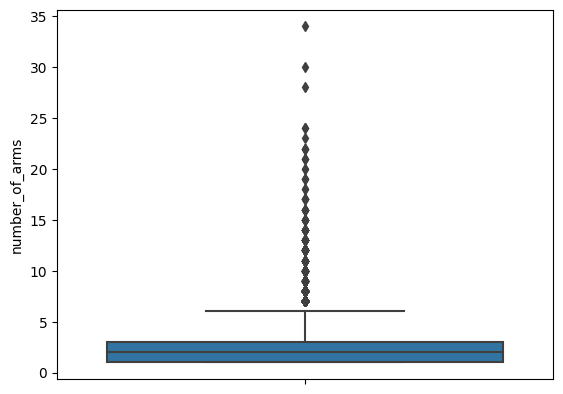

In [514]:
feature_name = 'number_of_arms'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
print('NMI: ', NMI(All_data_sub[~All_data_sub[feature_name].isna()][feature_name], All_data_sub[~All_data_sub[feature_name].isna()]['Y'].astype('category').cat.codes))
sns.boxplot(data=All_data_sub, y=feature_name)
# plt.show()
All_data_sub[feature_name].value_counts()

overall_official/last_name 人名	overall_official/role职称	overall_official/affiliation单位 

overall_contact/last_name	overall_contact/phone	overall_contact/email	overall_contact_backup/last_name 

In [490]:
All_data_sub['overall_official/affiliation'].value_counts()

overall_official/affiliation
GlaxoSmithKline                                                                            1212
Pfizer                                                                                      912
Hoffmann-La Roche                                                                           870
Novartis Pharmaceuticals                                                                    816
Eli Lilly and Company                                                                       677
                                                                                           ... 
Sun Yatsen University                                                                         1
Immunocore Ltd                                                                                1
Essentialis, Inc.                                                                             1
['Oklahoma Medical Research Foundation', 'Arthritis and Rheumatic Disease Specialties']       1
IRCCS Mondi

In [499]:
overall_role_num = {}
overall_role_y = {}
for index, overall_roles, y in All_data_sub[['overall_official/role', 'Y']].itertuples():
    if type(overall_roles) == list:
        overall_roles = eval(overall_roles)
        for overall_role in overall_roles:
            overall_role = overall_role.lower()
            if overall_role in overall_role_num.keys():
                overall_role_num[overall_role] += 1
                overall_role_y[overall_role].append(y)
            else:
                overall_role_num[overall_role] = 1
                overall_role_y[overall_role] = [y]
    elif type(overall_roles) == str and overall_roles[0] != '[':
        overall_roles = overall_roles.lower()
        if overall_roles in overall_role_num.keys():
            overall_role_num[overall_roles] += 1
            overall_role_y[overall_roles].append(y)
        else:
            overall_role_num[overall_roles] = 1
            overall_role_y[overall_roles] = [y]     
    elif type(overall_roles) == str and overall_roles[0] == '[':
        overall_roles = eval(overall_roles)
        for overall_role in overall_roles:
            overall_role = overall_role.lower()
            if overall_role in overall_role_num.keys():
                overall_role_num[overall_role] += 1
                overall_role_y[overall_role].append(y)
            else:
                overall_role_num[overall_role] = 1
                overall_role_y[overall_role] = [y]
     
overall_role_num

{'principal investigator': 20861,
 'study chair': 4644,
 'study director': 16047,
 'sub-investigator': 1}

In [500]:
overall_role_percent = {}
for k in overall_role_num.keys():
    overall_role_percent[k] = overall_role_y[k].count(False) / overall_role_num[k]
sorted(overall_role_percent.items(), key=lambda x: x[1], reverse=True)

[('study chair', 0.15310077519379844),
 ('principal investigator', 0.14999280954891903),
 ('study director', 0.05334330404436966),
 ('sub-investigator', 0.0)]

responsible_party/responsible_party_type responsible_party/investigator_affiliation	responsible_party/investigator_full_name	responsible_party/investigator_title responsible_party/name_title	responsible_party/organization

In [523]:
feature_name = 'responsible_party/organization'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
All_data_sub[feature_name].value_counts()

responsible_party/organization
NAN数量: 35210


responsible_party/organization
sanofi-aventis                          123
Eli Lilly                               110
Novartis Pharmaceuticals                 77
Novartis                                 73
Boehringer Ingelheim                     72
                                       ... 
ALK-ABELLO, S.A.                          1
QLT Inc.                                  1
Georgetown University Medical Center      1
Tissue Repair Company                     1
Bayer Yakuhin, Ltd                        1
Name: count, Length: 1266, dtype: int64

In [522]:
feature_name = 'responsible_party/name_title'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
All_data_sub[feature_name].value_counts()

responsible_party/name_title
NAN数量: 35194


responsible_party/name_title
External Affairs                                        125
Chief Medical Officer                                   125
Director, Clinical Trial Disclosure Group                97
Study Director                                           88
Boehringer Ingelheim, Study Chair                        72
                                                       ... 
Regulatory Protocol Associate                             1
Diane Amend, Clinical Trials Manager                      1
Brian Silver, MD                                          1
Kanya Rajangam, MD/Senior Manager, Clinical Research      1
Robert L. Comis                                           1
Name: count, Length: 1534, dtype: int64

In [518]:
feature_name = 'responsible_party/investigator_title'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
All_data_sub[feature_name].value_counts()

responsible_party/investigator_title
NAN数量: 31880


responsible_party/investigator_title
Principal Investigator                                                   752
Professor                                                                537
MD                                                                       263
Associate Professor                                                      215
Assistant Professor                                                      154
                                                                        ... 
deputy director                                                            1
Associate Prof. PD Dr                                                      1
director, R&D Division                                                     1
Department of Psychaitry Research Director, Mental Health Directorate      1
Rheumatology Physician assistant/Principal investigator                    1
Name: count, Length: 2411, dtype: int64

In [517]:
feature_name = 'responsible_party/investigator_full_name'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
All_data_sub[feature_name].value_counts()

responsible_party/investigator_full_name
NAN数量: 31880


responsible_party/investigator_full_name
Maurizio Fava, MD         11
Steven Rosenberg, M.D.    11
Yoon-Koo Kang              9
howard safran              8
Richard Burt, MD           8
                          ..
Dr Gary MIddleton          1
Anna Maria Hibbs           1
Samuel Krachman            1
Dale Shepard, MD, PhD      1
Andrea Lo Monaco           1
Name: count, Length: 4619, dtype: int64

In [516]:
feature_name = 'responsible_party/investigator_affiliation'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
All_data_sub[feature_name].value_counts()

responsible_party/investigator_affiliation
NAN数量: 31880


responsible_party/investigator_affiliation
Massachusetts General Hospital         168
Dana-Farber Cancer Institute           117
Stanford University                    100
Emory University                        98
University of Pittsburgh                95
                                      ... 
University Hospital of Mont-Godinne      1
Western Regional Medical Center          1
Chaitanya Hospital, Pune                 1
Psychiatric Centre Rigshospitalet        1
Hôpital Universitaire Sahloul            1
Name: count, Length: 1522, dtype: int64

responsible_party/responsible_party_type
NAN数量: 3957


NMI:  0.014794668131888901


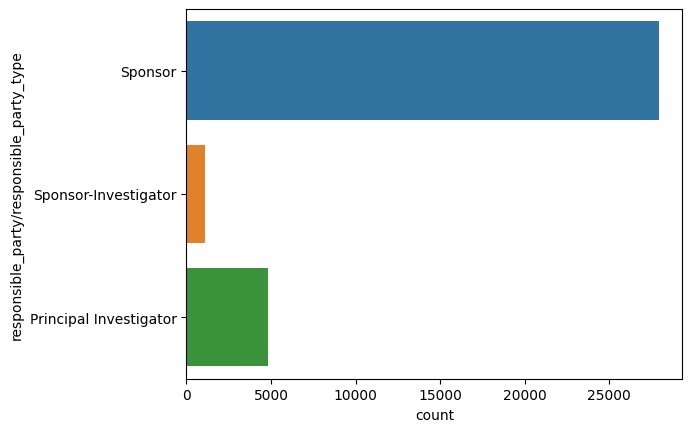

responsible_party/responsible_party_type
Sponsor                   27923
Principal Investigator     4793
Sponsor-Investigator       1125
Name: count, dtype: int64

In [493]:
feature_name = 'responsible_party/responsible_party_type'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
print('NMI: ', NMI(All_data_sub[~All_data_sub[feature_name].isna()][feature_name].astype('category').cat.codes, All_data_sub[~All_data_sub[feature_name].isna()]['Y'].astype('category').cat.codes))
sns.countplot(data=All_data_sub, y=feature_name)
plt.show()
All_data_sub[feature_name].value_counts()

reference/citation	reference/PMID link/url	link/description results_reference/citation	results_reference/PMID略过

In [498]:
All_data_sub['keyword'].value_counts()

keyword
Drug therapy                                                                                                             77
Drug Therapy                                                                                                             56
COPD                                                                                                                     47
Breast Cancer                                                                                                            26
Schizophrenia                                                                                                            25
                                                                                                                         ..
['asthma', 'albuterol', 'B2AR receptors', 'Acute asthma responsive and unresponsive to albuterol']                        1
["Friedreich's Ataxia", 'FRDA', 'Neurodegenerative', 'Erythropoietin', 'Carbamylated', 'Neuroprotection', 'Frataxin']     1


keword

In [503]:
keyword_num = {}
keyword_y = {}
for index, keywords, y in All_data_sub[['keyword', 'Y']].itertuples():
    if type(keywords) == list:
        keywords = eval(keywords)
        for keyword in keywords:
            keyword = keyword.lower()
            if keyword in keyword_num.keys():
                keyword_num[keyword] += 1
                keyword_y[keyword].append(y)
            else:
                keyword_num[keyword] = 1
                keyword_y[keyword] = [y]
    elif type(keywords) == str and keywords[0] != '[':
        keywords = keywords.lower()
        if keywords in keyword_num.keys():
            keyword_num[keywords] += 1
            keyword_y[keywords].append(y)
        else:
            keyword_num[keywords] = 1
            keyword_y[keywords] = [y]     
    elif type(keywords) == str and keywords[0] == '[':
        keywords = eval(keywords)
        for keyword in keywords:
            keyword = keyword.lower()
            if keyword in keyword_num.keys():
                keyword_num[keyword] += 1
                keyword_y[keyword].append(y)
            else:
                keyword_num[keyword] = 1
                keyword_y[keyword] = [y]

keyword_num


{"alzheimer's disease": 105,
 'cholinergic agents': 4,
 'cholinergic agonists': 1,
 'cholinesterase inhibitors': 10,
 'mild cognitive impairment': 14,
 'memory': 20,
 'donepezil': 19,
 'vitamin e': 7,
 'antioxidants': 7,
 'adult': 75,
 'acquired immunodeficiency syndrome': 13,
 'depression': 251,
 'female': 23,
 'human': 16,
 'imipramine': 1,
 'male': 13,
 'middle age': 1,
 'acquired immunodeficiency syndrome -- *complications': 1,
 'depression -- *drug therapy': 1,
 'depression -- etiology': 1,
 'imipramine -- *therapeutic use': 1,
 'diabetes mellitus, non-insulin-dependent': 1,
 'trimethoprim-sulfamethoxazole combination': 1,
 'pneumonia, pneumocystis carinii': 1,
 'drug therapy, combination': 13,
 'antiprotozoal agents': 2,
 'aids-related complex': 1,
 'azithromycin': 9,
 'bacterial infections': 8,
 'atovaquone': 2,
 'drug interactions': 5,
 'zidovudine': 2,
 'sex factors': 1,
 'reverse transcriptase inhibitors': 6,
 'contraceptives, oral': 1,
 'progestational hormones, synthetic': 

In [504]:
keyword_percent = {}
for k in keyword_num.keys():
    keyword_percent[k] = keyword_y[k].count(False) / keyword_num[k]
sorted(keyword_percent.items(), key=lambda x: x[1], reverse=True)

[('trimethoprim-sulfamethoxazole combination', 1.0),
 ('pneumonia, pneumocystis carinii', 1.0),
 ('aids-related complex', 1.0),
 ('atovaquone', 1.0),
 ('sex factors', 1.0),
 ('contraceptives, oral', 1.0),
 ('progestational hormones, synthetic', 1.0),
 ('estrogens', 1.0),
 ('indinavir', 1.0),
 ('squamous cell carcinoma of the bladder', 1.0),
 ('localized benign pheochromocytoma', 1.0),
 ('regional pheochromocytoma', 1.0),
 ('philadelphia chromosome negative chronic myelogenous leukemia', 1.0),
 ('lip and oral cavity cancer', 1.0),
 ('unresectable colon cancer', 1.0),
 ('advanced head and neck cancer', 1.0),
 ('hypopharyngeal cancer', 1.0),
 ('nasal cavity cancer', 1.0),
 ('paranasal sinus cancer', 1.0),
 ('non-small cell adenocarcinoma of the lung', 1.0),
 ('stage iv large cell lung cancer', 1.0),
 ('bronchial alveolar cancer recurrent', 1.0),
 ('bronchial alveolar cancer stage iv', 1.0),
 ('non hodgkin lymphoma recurrent', 1.0),
 ('non hodgkin lymphoma refractory', 1.0),
 ("refractory 

acronym

In [520]:
feature_name = 'acronym'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
All_data_sub[feature_name].value_counts()

acronym
NAN数量: 29342


acronym
BEGIN™        14
RESTORE       10
ASPIRE        10
OPTIMA         9
NSCLC          9
              ..
ACT II         1
BONPMS         1
LAPLACE        1
CAREER         1
BREEZE-AD7     1
Name: count, Length: 7447, dtype: int64

provided_document_section/provided_document/document_type	provided_document_section/provided_document/document_has_protocol	provided_document_section/provided_document/document_has_icf	provided_document_section/provided_document/document_has_sap	provided_document_section/provided_document/document_date	provided_document_section/provided_document/document_url 

In [550]:
feature_name = 'provided_document_section/provided_document/document_url'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
All_data_sub[feature_name].value_counts()

provided_document_section/provided_document/document_url
NAN数量: 33097


provided_document_section/provided_document/document_url
['https://ClinicalTrials.gov/ProvidedDocs/63/NCT00002663/Prot_000.pdf', 'https://ClinicalTrials.gov/ProvidedDocs/63/NCT00002663/SAP_001.pdf']    1
['https://ClinicalTrials.gov/ProvidedDocs/15/NCT02798315/Prot_000.pdf', 'https://ClinicalTrials.gov/ProvidedDocs/15/NCT02798315/SAP_001.pdf']    1
['https://ClinicalTrials.gov/ProvidedDocs/50/NCT02804750/Prot_000.pdf', 'https://ClinicalTrials.gov/ProvidedDocs/50/NCT02804750/SAP_001.pdf']    1
https://ClinicalTrials.gov/ProvidedDocs/94/NCT02804594/Prot_SAP_000.pdf                                                                          1
['https://ClinicalTrials.gov/ProvidedDocs/78/NCT02804178/Prot_000.pdf', 'https://ClinicalTrials.gov/ProvidedDocs/78/NCT02804178/SAP_001.pdf']    1
                                                                                                                                                ..
https://ClinicalTrials.gov/ProvidedDocs/94/NCT02253394/Prot_S

In [544]:
feature_name = 'provided_document_section/provided_document/document_type'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
All_data_sub[feature_name].value_counts()

provided_document_section/provided_document/document_type
NAN数量: 33097


provided_document_section/provided_document/document_type
['Study Protocol', 'Statistical Analysis Plan']                                                                                                                                                                                                                                                                                                                                                                    2177
Study Protocol and Statistical Analysis Plan                                                                                                                                                                                                                                                                                                                                                                       1639
['Statistical Analysis Plan', 'Study Protocol']                                                                               

In [547]:
document_type_num = {}
document_type_y = {}
for index, document_types, y in All_data_sub[['provided_document_section/provided_document/document_type', 'Y']].itertuples():
    if type(document_types) == list:
        document_types = eval(document_types)
        for document_type in document_types:
            document_type = document_type.lower()
            if document_type in document_type_num.keys():
                document_type_num[document_type] += 1
                document_type_y[document_type].append(y)
            else:
                document_type_num[document_type] = 1
                document_type_y[document_type] = [y]
    elif type(document_types) == str and document_types[0] != '[':
        document_types = document_types.lower()
        if document_types in document_type_num.keys():
            document_type_num[document_types] += 1
            document_type_y[document_types].append(y)
        else:
            document_type_num[document_types] = 1
            document_type_y[document_types] = [y]     
    elif type(document_types) == str and document_types[0] == '[':
        document_types = eval(document_types)
        for document_type in document_types:
            document_type = document_type.lower()
            if document_type in document_type_num.keys():
                document_type_num[document_type] += 1
                document_type_y[document_type].append(y)
            else:
                document_type_num[document_type] = 1
                document_type_y[document_type] = [y]
     
document_type_num

{'study protocol': 2654,
 'statistical analysis plan': 2649,
 'study protocol and statistical analysis plan': 1848,
 'study protocol, statistical analysis plan, and informed consent form': 79,
 'informed consent form': 277,
 'study protocol and informed consent form': 13,
 'study protocol and statistical analysis plan: original': 1,
 'study protocol: amendment': 1,
 'statistical analysis plan: sap 3.0': 1,
 'statistical analysis plan: sap 3.0 addendum': 1,
 'statistical analysis plan: induction therapy data analysis plan': 1,
 'statistical analysis plan: maintenance therapy data analysis plan': 1,
 'study protocol: amendment 4': 9,
 'informed consent form: amendment 4 icf': 1,
 'study protocol: protocol': 9,
 'study protocol: protocol amendment (a)': 3,
 'study protocol: protocol amendment (b)': 3,
 'study protocol: amendment 10 (version 9.0)': 1,
 'informed consent form: standard-addendum': 1,
 'informed consent form: donor': 1,
 'informed consent form: recipient': 1,
 'informed conse

In [548]:
document_type_percent = {}
for k in document_type_num.keys():
    document_type_percent[k] = document_type_y[k].count(False) / document_type_num[k]
sorted(document_type_percent.items(), key=lambda x: x[1], reverse=True)

[('statistical analysis plan: primary analysis', 1.0),
 ('statistical analysis plan: pk and safety interim analysis', 1.0),
 ('statistical analysis plan: moc figures sap', 1.0),
 ('statistical analysis plan: moc tables sap', 1.0),
 ('study protocol and statistical analysis plan: v. 0.0 - initial', 1.0),
 ('study protocol and statistical analysis plan: v. 0.1', 1.0),
 ('study protocol and statistical analysis plan: v. 1.0', 1.0),
 ('study protocol and statistical analysis plan: v. 2.0', 1.0),
 ('study protocol: abi-007-nscl-004protocolam1redactedfinal.12jan 2015', 1.0),
 ('study protocol: abi-007-nscl-004.originalprotocolredacted11aug2014', 1.0),
 ('study protocol and statistical analysis plan: initial protocol', 1.0),
 ('study protocol and statistical analysis plan: version 1.0', 1.0),
 ('informed consent form: screening consent', 0.5),
 ('statistical analysis plan: statistical analysis plan', 0.5),
 ('informed consent form: standard consent', 0.3333333333333333),
 ('informed consent f

patient_data/ipd_description  patient_data/ipd_info_type	patient_data/ipd_time_frame	   patient_data/ipd_url  patient_data/ipd_access_criteria

In [533]:
feature_name = 'patient_data/ipd_access_criteria'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
All_data_sub[feature_name].value_counts()

patient_data/ipd_access_criteria
NAN数量: 36785


patient_data/ipd_access_criteria
Access is provided after a research proposal is submitted and has received approval from the Independent Review Panel and after a Data Sharing Agreement is in place. Access is provided for an initial period of 12 months but an extension can be granted, when justified, for up to another 12 months.                                                                                                                                                  191
A research proposal must be approved by an independent review panel and researchers must sign a data sharing agreement.                                                                                                                                                                                                                                                                                                                                    142
A secured external environment with username, password, and RSA code.    

In [532]:
feature_name = 'patient_data/ipd_url'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
All_data_sub[feature_name].value_counts()

patient_data/ipd_url
NAN数量: 36270


patient_data/ipd_url
http://engagezone.msd.com/ds_documentation.php                                         388
https://vivli.org/                                                                     150
https://www.pfizer.com/science/clinical_trials/trial_data_and_results/data_requests    131
https://www.clinicalstudydatarequest.com/                                               88
https://vivli.org/ourmember/daiichi-sankyo/                                             88
                                                                                      ... 
https://clinicalstudydatarequest.com/Posting.aspx?ID=19838                               1
https://www.clinicalstudydatarequest.com/Posting.aspx?ID=16039                           1
https://www.clinicalstudydatarequest.com/Posting.aspx?ID=20862                           1
https://clinicalstudydatarequest.com/Posting.aspx?ID=20769                               1
https://trials.arcusbio.com/our-transparency-policy                  

In [531]:
feature_name = 'patient_data/ipd_time_frame'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
All_data_sub[feature_name].value_counts()

patient_data/ipd_time_frame
NAN数量: 36842


patient_data/ipd_time_frame
IPD is available via the Clinical Study Data Request site (click on the link provided below)                                                                                                                                                                                                                                                               134
Data are available 6 months after the primary publication and approval of the indication studied in the US and EU, whichever is later. Data will be indefinitely available for requesting.                                                                                                                                                                 123
18 months after study completion                                                                                                                                                                                                                                              

In [528]:
feature_name = 'patient_data/ipd_info_type'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
All_data_sub[feature_name].value_counts()

patient_data/ipd_info_type
NAN数量: 36795


patient_data/ipd_info_type
['Study Protocol', 'Statistical Analysis Plan (SAP)', 'Clinical Study Report (CSR)']                                                    335
['Study Protocol', 'Statistical Analysis Plan (SAP)', 'Informed Consent Form (ICF)', 'Clinical Study Report (CSR)']                     328
['Study Protocol', 'Statistical Analysis Plan (SAP)']                                                                                   186
['Study Protocol', 'Statistical Analysis Plan (SAP)', 'Informed Consent Form (ICF)', 'Clinical Study Report (CSR)', 'Analytic Code']     43
['Study Protocol', 'Statistical Analysis Plan (SAP)', 'Clinical Study Report (CSR)', 'Analytic Code']                                    28
['Study Protocol', 'Statistical Analysis Plan (SAP)', 'Informed Consent Form (ICF)']                                                     22
Study Protocol                                                                                                                       

In [529]:
patient_idp_type_num = {}
patient_idp_type_y = {}
for index, patient_idp_types, y in All_data_sub[['patient_data/ipd_info_type', 'Y']].itertuples():
    if type(patient_idp_types) == list:
        patient_idp_types = eval(patient_idp_types)
        for patient_idp_type in patient_idp_types:
            patient_idp_type = patient_idp_type.lower()
            if patient_idp_type in patient_idp_type_num.keys():
                patient_idp_type_num[patient_idp_type] += 1
                patient_idp_type_y[patient_idp_type].append(y)
            else:
                patient_idp_type_num[patient_idp_type] = 1
                patient_idp_type_y[patient_idp_type] = [y]
    elif type(patient_idp_types) == str and patient_idp_types[0] != '[':
        patient_idp_types = patient_idp_types.lower()
        if patient_idp_types in patient_idp_type_num.keys():
            patient_idp_type_num[patient_idp_types] += 1
            patient_idp_type_y[patient_idp_types].append(y)
        else:
            patient_idp_type_num[patient_idp_types] = 1
            patient_idp_type_y[patient_idp_types] = [y]     
    elif type(patient_idp_types) == str and patient_idp_types[0] == '[':
        patient_idp_types = eval(patient_idp_types)
        for patient_idp_type in patient_idp_types:
            patient_idp_type = patient_idp_type.lower()
            if patient_idp_type in patient_idp_type_num.keys():
                patient_idp_type_num[patient_idp_type] += 1
                patient_idp_type_y[patient_idp_type].append(y)
            else:
                patient_idp_type_num[patient_idp_type] = 1
                patient_idp_type_y[patient_idp_type] = [y]
     
patient_idp_type_percent = {}
for k in patient_idp_type_num.keys():
    patient_idp_type_percent[k] = patient_idp_type_y[k].count(False) / patient_idp_type_num[k]
sorted(patient_idp_type_percent.items(), key=lambda x: x[1], reverse=True)

[('analytic code', 0.02666666666666667),
 ('informed consent form (icf)', 0.016867469879518072),
 ('study protocol', 0.014155712841253791),
 ('statistical analysis plan (sap)', 0.013727560718057022),
 ('clinical study report (csr)', 0.013245033112582781)]

In [521]:
feature_name = 'patient_data/ipd_description'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
All_data_sub[feature_name].value_counts()

patient_data/ipd_description
NAN数量: 34320


patient_data/ipd_description
Patient-level data for this study will be made available through www.clinicalstudydatarequest.com following the timelines and process described on this site.                                                                                                                                                                                                                                                                                                                        529
https://www.merck.com/clinical-trials/pdf/ProcedureAccessClinicalTrialData.pdf                                                                                                                                                                                                                                                                                                                                                                                                       206
http://engagezone.msd.com

oversight_info/is_fda_regulated_drug	oversight_info/is_fda_regulated_device	oversight_info/is_us_export

oversight_info/has_dmc
NAN数量: 7060
NMI:  0.0037633554118046203


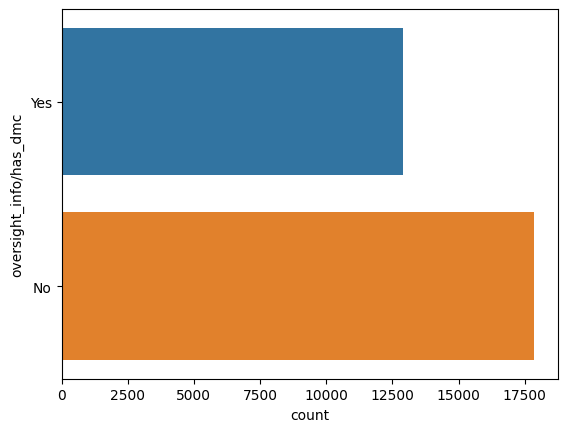

oversight_info/has_dmc
No     17843
Yes    12895
Name: count, dtype: int64

In [ ]:
feature_name = 'oversight_info/has_dmc'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
print('NMI: ', NMI(All_data_sub[~All_data_sub[feature_name].isna()][feature_name].astype('category').cat.codes, All_data_sub[~All_data_sub[feature_name].isna()]['Y'].astype('category').cat.codes))
sns.countplot(data=All_data_sub, y=feature_name)
plt.show()
All_data_sub[feature_name].value_counts()

oversight_info/is_us_export
NAN数量: 36730
NMI:  0.00955462718685376


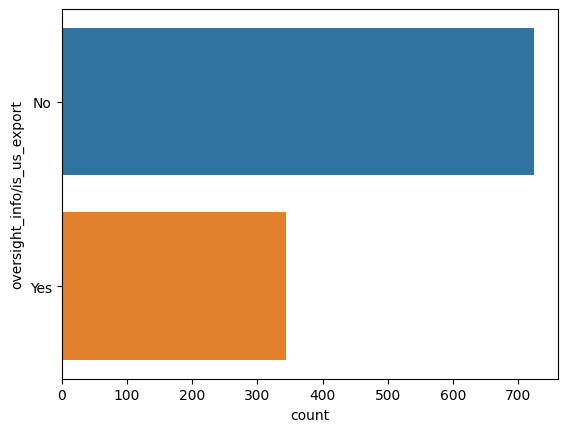

oversight_info/is_us_export
No     724
Yes    344
Name: count, dtype: int64

In [539]:
feature_name = 'oversight_info/is_us_export'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
print('NMI: ', NMI(All_data_sub[~All_data_sub[feature_name].isna()][feature_name].astype('category').cat.codes, All_data_sub[~All_data_sub[feature_name].isna()]['Y'].astype('category').cat.codes))
sns.countplot(data=All_data_sub, y=feature_name)
plt.show()
All_data_sub[feature_name].value_counts()

oversight_info/is_fda_regulated_device
NAN数量: 32093
NMI:  0.001018509198260304


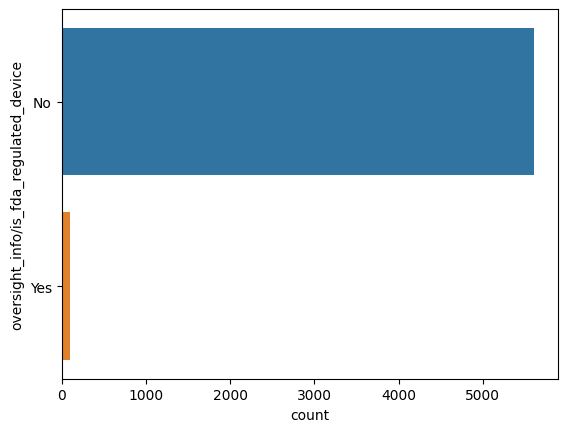

oversight_info/is_fda_regulated_device
No     5605
Yes     100
Name: count, dtype: int64

In [538]:
feature_name = 'oversight_info/is_fda_regulated_device'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
print('NMI: ', NMI(All_data_sub[~All_data_sub[feature_name].isna()][feature_name].astype('category').cat.codes, All_data_sub[~All_data_sub[feature_name].isna()]['Y'].astype('category').cat.codes))
sns.countplot(data=All_data_sub, y=feature_name)
plt.show()
All_data_sub[feature_name].value_counts()

oversight_info/is_fda_regulated_drug
NAN数量: 32089
NMI:  0.00965923787028189


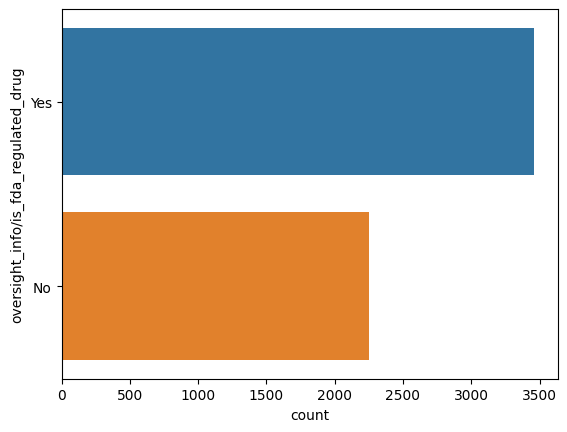

oversight_info/is_fda_regulated_drug
Yes    3459
No     2250
Name: count, dtype: int64

In [537]:
feature_name = 'oversight_info/is_fda_regulated_drug'
print(feature_name)
print('NAN数量:', All_data_sub[feature_name].isna().sum())
print('NMI: ', NMI(All_data_sub[~All_data_sub[feature_name].isna()][feature_name].astype('category').cat.codes, All_data_sub[~All_data_sub[feature_name].isna()]['Y'].astype('category').cat.codes))
sns.countplot(data=All_data_sub, y=feature_name)
plt.show()
All_data_sub[feature_name].value_counts()

clinical_results

In [556]:
clinical_results = [k for k in All_data_sub.columns if 'clinical_results' in k]
clinical_results

['clinical_results/participant_flow/recruitment_details',
 'clinical_results/participant_flow/pre_assignment_details',
 'clinical_results/participant_flow/group_list/group/title',
 'clinical_results/participant_flow/group_list/group/description',
 'clinical_results/participant_flow/period_list/period/title',
 'clinical_results/participant_flow/period_list/period/milestone_list/milestone/title',
 'clinical_results/participant_flow/period_list/period/drop_withdraw_reason_list/drop_withdraw_reason/title',
 'clinical_results/baseline/group_list/group/title',
 'clinical_results/baseline/group_list/group/description',
 'clinical_results/baseline/analyzed_list/analyzed/units',
 'clinical_results/baseline/analyzed_list/analyzed/scope',
 'clinical_results/baseline/measure_list/measure/title',
 'clinical_results/baseline/measure_list/measure/units',
 'clinical_results/baseline/measure_list/measure/param',
 'clinical_results/baseline/measure_list/measure/dispersion',
 'clinical_results/baseline/m

In [563]:
All_data_sub['clinical_results/outcome_list/outcome/type'].isna()

NCT00000102     True
NCT00000172     True
NCT00000173     True
NCT00000174     True
NCT00000390     True
               ...  
NCT03731793     True
NCT03733301    False
NCT03733574     True
NCT03736044     True
NCT03736473     True
Name: clinical_results/outcome_list/outcome/type, Length: 37798, dtype: bool

In [562]:
for feature_name in clinical_results:
    print(feature_name)
    print('NAN数量:', All_data_sub[feature_name].isna().sum())
    # print('NMI: ', NMI(All_data_sub[~All_data_sub[feature_name].isna()][feature_name].astype('category').cat.codes, All_data_sub[~All_data_sub[feature_name].isna()]['Y'].astype('category').cat.codes))
    # sns.countplot(data=All_data_sub, y=feature_name)
    # plt.show()
    All_data_sub[feature_name].value_counts()

clinical_results/participant_flow/recruitment_details
NAN数量: 29720
clinical_results/participant_flow/pre_assignment_details
NAN数量: 29479
clinical_results/participant_flow/group_list/group/title
NAN数量: 20131
clinical_results/participant_flow/group_list/group/description
NAN数量: 20258
clinical_results/participant_flow/period_list/period/title
NAN数量: 20131
clinical_results/participant_flow/period_list/period/milestone_list/milestone/title
NAN数量: 20131
clinical_results/participant_flow/period_list/period/drop_withdraw_reason_list/drop_withdraw_reason/title
NAN数量: 24421


clinical_results/baseline/group_list/group/title
NAN数量: 20131
clinical_results/baseline/group_list/group/description
NAN数量: 20233
clinical_results/baseline/analyzed_list/analyzed/units
NAN数量: 20131
clinical_results/baseline/analyzed_list/analyzed/scope
NAN数量: 20131
clinical_results/baseline/measure_list/measure/title
NAN数量: 20131
clinical_results/baseline/measure_list/measure/units
NAN数量: 20138
clinical_results/baseline/measure_list/measure/param
NAN数量: 20158
clinical_results/baseline/measure_list/measure/dispersion
NAN数量: 22331
clinical_results/baseline/measure_list/measure/class_list/class/category_list/category/title
NAN数量: 20454
clinical_results/baseline/measure_list/measure/class_list/class/title
NAN数量: 26609
clinical_results/outcome_list/outcome/type
NAN数量: 20131
clinical_results/outcome_list/outcome/title
NAN数量: 20131
clinical_results/outcome_list/outcome/description
NAN数量: 20598
clinical_results/outcome_list/outcome/time_frame
NAN数量: 20133
clinical_results/outcome_list/outcome/

In [639]:
All_data['enrollment']

NCT00000102      NaN
NCT00000105    112.0
NCT00000172      NaN
NCT00000173      NaN
NCT00000174      NaN
               ...  
NCT03733301    329.0
NCT03733574     56.0
NCT03735446      2.0
NCT03736044     48.0
NCT03736473      6.0
Name: enrollment, Length: 51259, dtype: float64